# Objective
**Perform Exploratory Data Analysis for the Dataset Provided uisng Python, then load the data into a database using pandas and Solve the queries. The dataset is about customer purchasing history, and focused on determining potential customers.**

You have been provided with information such as customers spending for last sevral years, the amount of money spent,Number of inactive months and so on

##  Import necessary Packages

In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from IPython.display import display
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

### Load the Data into Pandas Dataframe

In [2]:
customers = pd.read_csv("../data/capstone.csv")

In [3]:
# View first 5 rows of the dataframe
customers.head(5)

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,$5.00,2,17,2,4,$0.00,$7.50,$7.76,$7.50,14,110,32,48,73,3,12,16,A,0,71.0,F,H,"$65,957.00"
1,1,87939,$30.00,1,7,0,3,$25.00,$25.00,$13.00,NaN,18,75,13,35,55,6,6,22,A,1,7.0,M,U,$0.00
2,0,88003,NaN,5,12,3,5,$15.00,$15.00,$11.25,$14.67,19,57,14,35,53,6,17,22,S,1,79.0,F,U,$0.00
3,1,188721,$20.00,1,11,0,3,$20.00,$20.00,$12.45,NaN,5,113,17,38,71,8,8,33,A,0,73.0,F,U,"$76,293.00"
4,1,88056,$5.00,3,15,2,7,$3.00,$4.33,$3.80,$4.00,17,118,13,28,63,6,12,24,S,1,68.0,F,H,"$113,663.00"


In [4]:
# View your data
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

# <font color=red>Data Cleaning<font>
Checking the existance of missing values, the type of variables, or integrity of data.

### Check our dataset (number of rows, features and total datapoints)

In [5]:
print(f"There are a total of {customers.shape[0]} rows and {customers.shape[1]} columns or features in this dataset.")

There are a total of 4469 rows and 25 columns or features in this dataset.


### Check the columns that we have

In [6]:
customers.columns

Index(['Potential_Customer', 'C_ID', 'Cust_Last_Purchase', 'Pur_3_years',
       'Pur_5_years', 'Pur_3_years_Indirect', 'Pur_5_years_Indirect',
       'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg',
       'Pur_3_years_Avg_Indirect', 'InAct_Last', 'InAct_First',
       'Ad_Res_1_year', 'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year',
       'Ad_Res_Ind_3_Year', 'Ad_Res_Ind_5_Year', 'Status_Cust',
       'Status_Latest_Ad', 'Age', 'Gender', 'Cust_Prop', 'Cust_Ann_Income'],
      dtype='object')

### What is the type of each column?

In [7]:
customers.dtypes

Potential_Customer            int64
C_ID                          int64
Cust_Last_Purchase           object
Pur_3_years                   int64
Pur_5_years                   int64
Pur_3_years_Indirect          int64
Pur_5_years_Indirect          int64
Pur_latest                   object
Pur_3_years_Avg              object
Pur_5_years_Avg              object
Pur_3_years_Avg_Indirect     object
InAct_Last                    int64
InAct_First                   int64
Ad_Res_1_year                 int64
Ad_Res_3_Year                 int64
Ad_Res_5_Year                 int64
Ad_Res_Ind_1_Year             int64
Ad_Res_Ind_3_Year             int64
Ad_Res_Ind_5_Year             int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income              object
dtype: object

### Notice that columns such as Cust_Last_Purchase are object while they should be float64.

#### Notice Some features have Dollar AND Comma. Remove the dollar sign and comma from these features.

In [8]:
customers.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,$5.00,2,17,2,4,$0.00,$7.50,$7.76,$7.50,14,110,32,48,73,3,12,16,A,0,71.0,F,H,"$65,957.00"
1,1,87939,$30.00,1,7,0,3,$25.00,$25.00,$13.00,NaN,18,75,13,35,55,6,6,22,A,1,7.0,M,U,$0.00
2,0,88003,NaN,5,12,3,5,$15.00,$15.00,$11.25,$14.67,19,57,14,35,53,6,17,22,S,1,79.0,F,U,$0.00
3,1,188721,$20.00,1,11,0,3,$20.00,$20.00,$12.45,NaN,5,113,17,38,71,8,8,33,A,0,73.0,F,U,"$76,293.00"
4,1,88056,$5.00,3,15,2,7,$3.00,$4.33,$3.80,$4.00,17,118,13,28,63,6,12,24,S,1,68.0,F,H,"$113,663.00"


In [9]:
#Remove '$' and ',' sign

cols = ['Cust_Last_Purchase','Pur_latest', 'Pur_3_years_Avg','Pur_5_years_Avg', 'Pur_3_years_Avg_Indirect', 'Cust_Ann_Income']

for i in cols:
    customers[i] = customers[i].str.replace('$', '')
    customers[i] = customers[i].str.replace(',', '')

customers.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,5.00,2,17,2,4,0.00,7.50,7.76,7.50,14,110,32,48,73,3,12,16,A,0,71.0,F,H,65957.00
1,1,87939,30.00,1,7,0,3,25.00,25.00,13.00,NaN,18,75,13,35,55,6,6,22,A,1,7.0,M,U,0.00
2,0,88003,NaN,5,12,3,5,15.00,15.00,11.25,14.67,19,57,14,35,53,6,17,22,S,1,79.0,F,U,0.00
3,1,188721,20.00,1,11,0,3,20.00,20.00,12.45,NaN,5,113,17,38,71,8,8,33,A,0,73.0,F,U,76293.00
4,1,88056,5.00,3,15,2,7,3.00,4.33,3.80,4.00,17,118,13,28,63,6,12,24,S,1,68.0,F,H,113663.00


In [10]:
# change certain column data type from object to float

cols = ['Cust_Last_Purchase','Pur_latest', 'Pur_3_years_Avg','Pur_5_years_Avg', 'Pur_3_years_Avg_Indirect', 'Cust_Ann_Income']

for i in cols:
    customers[i] = customers[i].astype('float64')
    
customers.dtypes

Potential_Customer            int64
C_ID                          int64
Cust_Last_Purchase          float64
Pur_3_years                   int64
Pur_5_years                   int64
Pur_3_years_Indirect          int64
Pur_5_years_Indirect          int64
Pur_latest                  float64
Pur_3_years_Avg             float64
Pur_5_years_Avg             float64
Pur_3_years_Avg_Indirect    float64
InAct_Last                    int64
InAct_First                   int64
Ad_Res_1_year                 int64
Ad_Res_3_Year                 int64
Ad_Res_5_Year                 int64
Ad_Res_Ind_1_Year             int64
Ad_Res_Ind_3_Year             int64
Ad_Res_Ind_5_Year             int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income             float64
dtype: object

### Check data for duplicate rows

In [11]:
# Is there any duplicate in the data
customers.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4464     True
4465     True
4466     True
4467     True
4468     True
Length: 4469, dtype: bool

In [12]:
# Find the number of duplicates
print("The number of duplicates:")
customers.duplicated().sum()

The number of duplicates:


851

### Remove duplicate rows

In [13]:
# Remove duplicates

customers = customers.drop_duplicates()

In [14]:
# Check for duplicates
customers.duplicated().sum()

0

### Identify whether we need C_ID in our analysis

Yes we need C_ID in our analysis because we define it as an index column

### Check whether the columns' types are accurate for Exploratory Data Analysis (EDA)

In [15]:
customers.info()
#customers.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        3618 non-null   int64  
 1   C_ID                      3618 non-null   int64  
 2   Cust_Last_Purchase        1736 non-null   float64
 3   Pur_3_years               3618 non-null   int64  
 4   Pur_5_years               3618 non-null   int64  
 5   Pur_3_years_Indirect      3618 non-null   int64  
 6   Pur_5_years_Indirect      3618 non-null   int64  
 7   Pur_latest                3618 non-null   float64
 8   Pur_3_years_Avg           3618 non-null   float64
 9   Pur_5_years_Avg           3618 non-null   float64
 10  Pur_3_years_Avg_Indirect  2956 non-null   float64
 11  InAct_Last                3618 non-null   int64  
 12  InAct_First               3618 non-null   int64  
 13  Ad_Res_1_year             3618 non-null   int64  
 14  Ad_Res_3

In [16]:
# Change Potential_Customer and Status_Latest_Ad datatype from int64 to object
cols = ['Potential_Customer', 'Status_Latest_Ad']

for i in cols:
    customers[i] = customers[i].astype('object')
    
# Change Pur_3_years, Pur_5_years, Pur_3_years_Indirect, Pur_5_years_Indirect, datatype from int64 to object
cols = ['Pur_3_years', 'Pur_5_years', 'Pur_3_years_Indirect', 'Pur_5_years_Indirect']

for i in cols:
    customers[i] = customers[i].astype('float64')
    
customers.dtypes

Potential_Customer           object
C_ID                          int64
Cust_Last_Purchase          float64
Pur_3_years                 float64
Pur_5_years                 float64
Pur_3_years_Indirect        float64
Pur_5_years_Indirect        float64
Pur_latest                  float64
Pur_3_years_Avg             float64
Pur_5_years_Avg             float64
Pur_3_years_Avg_Indirect    float64
InAct_Last                    int64
InAct_First                   int64
Ad_Res_1_year                 int64
Ad_Res_3_Year                 int64
Ad_Res_5_Year                 int64
Ad_Res_Ind_1_Year             int64
Ad_Res_Ind_3_Year             int64
Ad_Res_Ind_5_Year             int64
Status_Cust                  object
Status_Latest_Ad             object
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income             float64
dtype: object

# <font color=red>Exploratory Data Analysis (EDA)<font>
Checking the relationship of variables, summary of data, outliers, filling missing values etc.

## Explore Categorical Variables

In [17]:
customers.describe(include = object)

,Potential_Customer,Status_Cust,Status_Latest_Ad,Gender,Cust_Prop
count,3618,3618,3618,3618,3618
unique,2,6,2,3,2
top,0,A,1,F,H
freq,1882,2146,2057,1922,1981


### Explore Relationship Between Categorical & Target Variable

In [18]:
categorical = ['Status_Cust','Status_Latest_Ad','Gender','Cust_Prop']

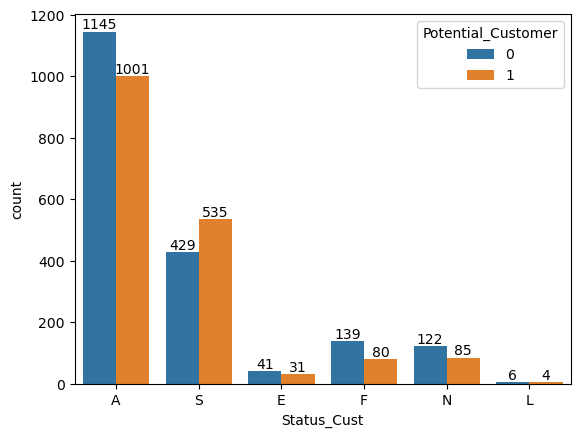

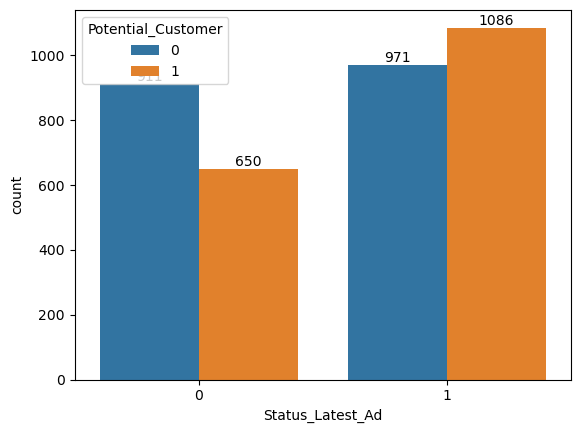

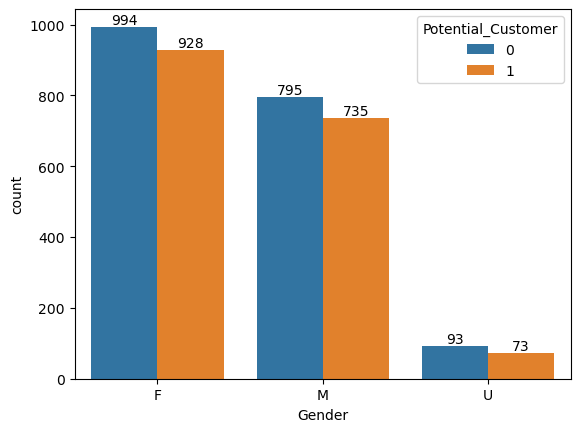

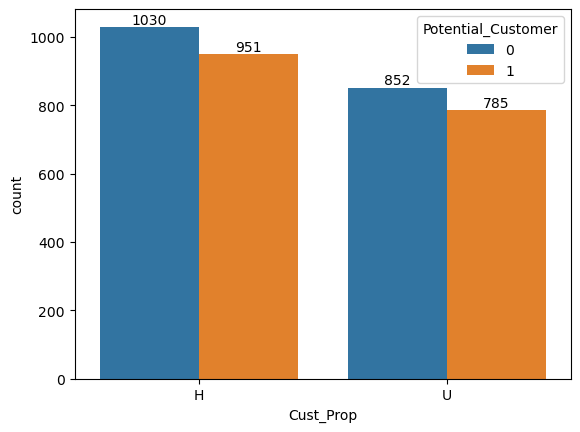

In [19]:
for i,x in enumerate(customers[categorical]):
    plt.figure(i)
    ax = sns.countplot(data = customers, x = x, hue = 'Potential_Customer')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.show()

### Insight

    1.Active and star buyers has the highest contributions to being potential customers compared to other buyers.
    2.Following the latest promotional sales, there is a rise in the number of potential customers.
    3.Female gender has the highest contributions to being potential customers compared to Male and Unknown gender.
    4.The number of customer who owns a house has the highest contributions to being a potential customers.

### Solution

1. Improve promotional ads for active and star buyers.
2. New and first time buyer, as well as inactive and lapsing buyer should be under the same group.

## Explore Numerical Variables

In [20]:
customers.describe()

,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Age,Cust_Ann_Income
count,3618.000000,1736.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,2956.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,2825.000000,3618.000000
mean,70151.997236,14.557748,3.308734,11.018795,1.909066,5.887507,15.267344,14.309536,11.913532,13.582128,17.934218,73.807352,13.031786,29.598673,49.613875,5.403814,12.064400,19.508292,59.018761,41608.894417
std,35499.154163,11.566174,2.185492,9.405537,1.624995,4.904147,10.794970,10.060256,8.046675,9.729153,4.145219,38.127214,4.941665,7.728158,22.864578,1.356644,4.569374,8.547971,16.900077,26127.991993
min,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.750000,4.000000,15.000000,3.000000,5.000000,7.000000,1.000000,2.000000,3.000000,0.000000,0.000000
25%,50146.500000,8.000000,2.000000,4.000000,1.000000,2.000000,10.000000,9.000000,7.500000,8.000000,16.000000,40.000000,11.000000,26.000000,31.000000,5.000000,8.000000,13.000000,47.000000,31385.750000
50%,68694.000000,11.000000,3.000000,9.000000,2.000000,5.000000,15.000000,13.000000,10.295000,11.670000,18.000000,74.000000,12.000000,31.000000,50.000000,6.000000,13.000000,20.000000,60.000000,44284.500000
75%,87779.500000,20.000000,4.000000,15.000000,3.000000,9.000000,20.000000,17.500000,14.787500,16.670000,20.000000,111.000000,13.000000,33.000000,66.000000,6.000000,16.000000,27.000000,73.000000,56508.000000
max,191672.000000,200.000000,15.000000,91.000000,9.000000,41.000000,250.000000,260.000000,200.000000,260.000000,27.000000,260.000000,49.000000,71.000000,157.000000,17.000000,28.000000,56.000000,87.000000,174305.000000


In [21]:
numerical = ['Cust_Last_Purchase','Pur_3_years','Pur_5_years','Pur_3_years_Indirect', 'Pur_5_years_Indirect', 'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg', 'Pur_3_years_Avg_Indirect', 'InAct_Last', 'InAct_First', 'Ad_Res_1_year', 'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year', 'Ad_Res_Ind_3_Year', 'Ad_Res_Ind_5_Year', 'Age', 'Cust_Ann_Income']

array([[<AxesSubplot:title={'center':'Cust_Last_Purchase'}>,
        <AxesSubplot:title={'center':'Pur_3_years'}>,
        <AxesSubplot:title={'center':'Pur_5_years'}>,
        <AxesSubplot:title={'center':'Pur_3_years_Indirect'}>],
       [<AxesSubplot:title={'center':'Pur_5_years_Indirect'}>,
        <AxesSubplot:title={'center':'Pur_latest'}>,
        <AxesSubplot:title={'center':'Pur_3_years_Avg'}>,
        <AxesSubplot:title={'center':'Pur_5_years_Avg'}>],
       [<AxesSubplot:title={'center':'Pur_3_years_Avg_Indirect'}>,
        <AxesSubplot:title={'center':'InAct_Last'}>,
        <AxesSubplot:title={'center':'InAct_First'}>,
        <AxesSubplot:title={'center':'Ad_Res_1_year'}>],
       [<AxesSubplot:title={'center':'Ad_Res_3_Year'}>,
        <AxesSubplot:title={'center':'Ad_Res_5_Year'}>,
        <AxesSubplot:title={'center':'Ad_Res_Ind_1_Year'}>,
        <AxesSubplot:title={'center':'Ad_Res_Ind_3_Year'}>],
       [<AxesSubplot:title={'center':'Ad_Res_Ind_5_Year'}>,
        <A

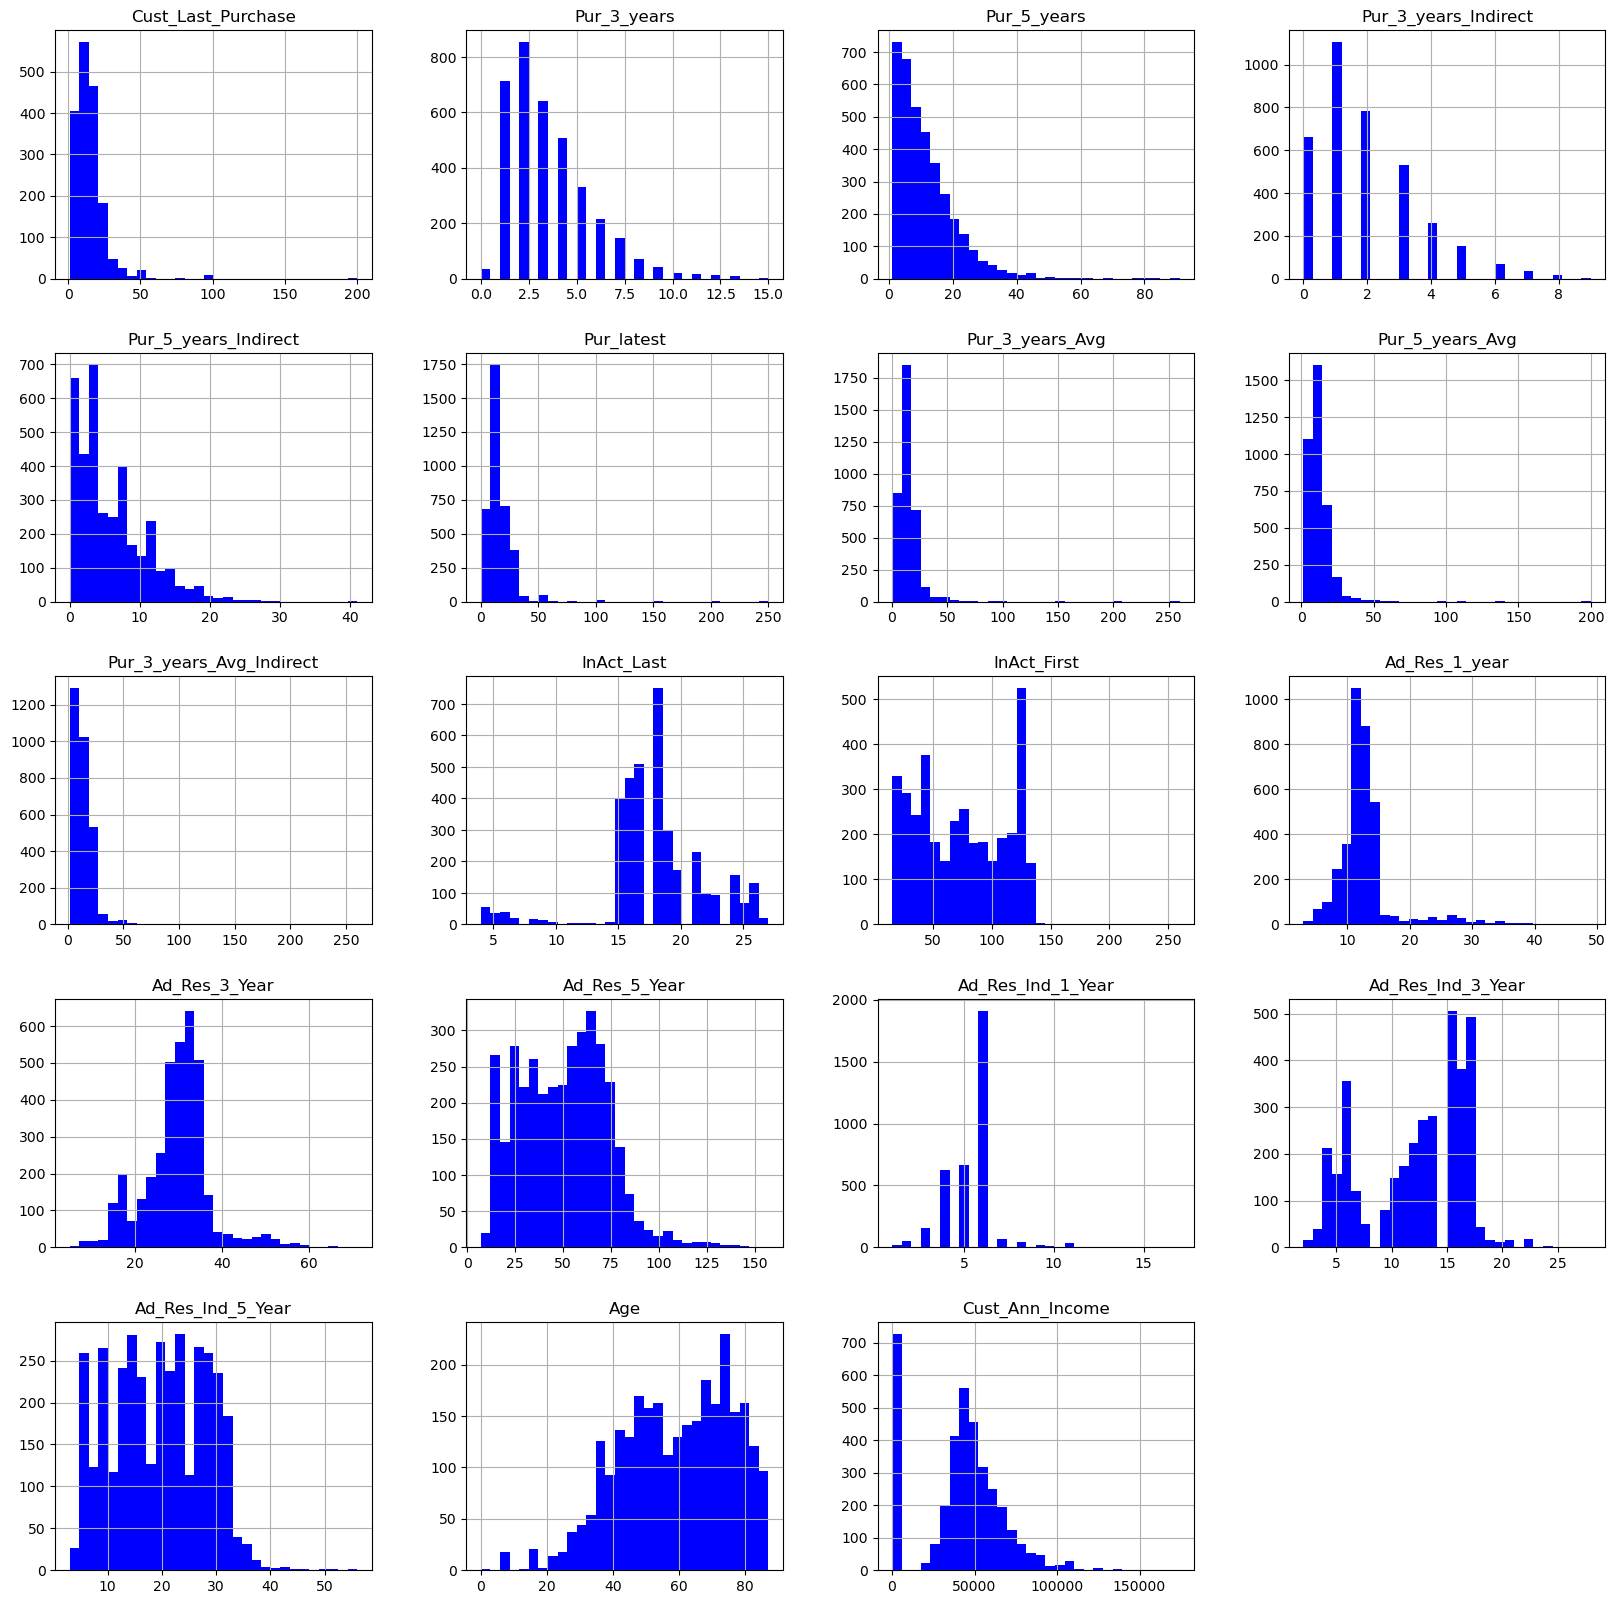

In [22]:
customers[numerical].hist(bins = 30, figsize =(20, 20), color = 'b')

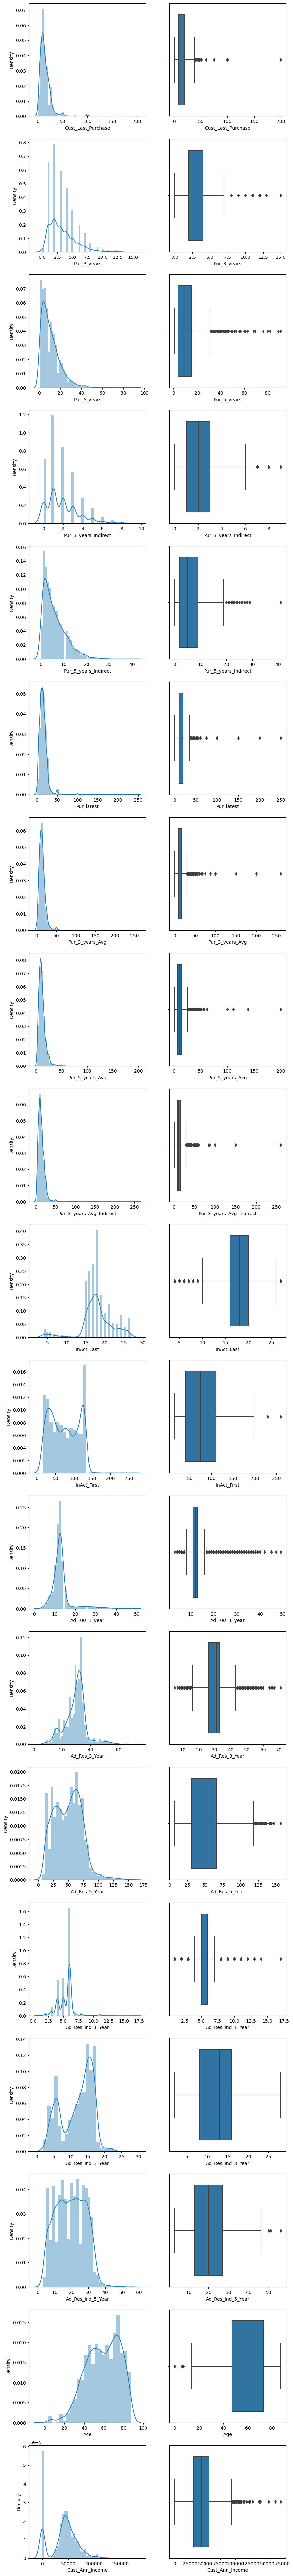

In [23]:
fig, ax = plt.subplots(nrows = len(numerical), ncols = 2, figsize = (10, 100))
for a in range(len(numerical)):
    sns.distplot(customers[numerical[a]], ax = ax[a,0])
    sns.boxplot(customers[numerical[a]], ax = ax[a,1])

###  Check the skewness and kurtosis of the variables

In [24]:
from scipy.stats import norm, poisson, uniform, skew, kurtosis, iqr

customers.skew()

Potential_Customer          0.080807
C_ID                        1.026921
Cust_Last_Purchase          4.966810
Pur_3_years                 1.291322
Pur_5_years                 2.079296
Pur_3_years_Indirect        1.124769
Pur_5_years_Indirect        1.287071
Pur_latest                  6.660116
Pur_3_years_Avg             7.913836
Pur_5_years_Avg             6.756579
Pur_3_years_Avg_Indirect    8.043963
InAct_Last                 -0.808274
InAct_First                 0.136455
Ad_Res_1_year               2.788479
Ad_Res_3_Year               0.321259
Ad_Res_5_Year               0.401333
Ad_Res_Ind_1_Year           0.943712
Ad_Res_Ind_3_Year          -0.448007
Ad_Res_Ind_5_Year           0.068045
Status_Latest_Ad           -0.276913
Age                        -0.406354
Cust_Ann_Income             0.039826
dtype: float64

In [25]:
customers.kurt()

Potential_Customer           -1.994573
C_ID                          3.044238
Cust_Last_Purchase           51.839743
Pur_3_years                   2.115542
Pur_5_years                   8.114353
Pur_3_years_Indirect          1.375351
Pur_5_years_Indirect          2.046352
Pur_latest                  101.756152
Pur_3_years_Avg             145.520014
Pur_5_years_Avg             112.633657
Pur_3_years_Avg_Indirect    159.364308
InAct_Last                    2.506173
InAct_First                  -1.171029
Ad_Res_1_year                10.520905
Ad_Res_3_Year                 2.171718
Ad_Res_5_Year                 0.235607
Ad_Res_Ind_1_Year             7.304920
Ad_Res_Ind_3_Year            -0.898953
Ad_Res_Ind_5_Year            -0.813542
Status_Latest_Ad             -1.924383
Age                          -0.441947
Cust_Ann_Income               0.438975
dtype: float64

### There are three methods to handling skewness and kurtosis:
1. Log transform
2. Square root transform
3. Box-cox transform

#### However I will show only 2 which are log and square root transform

In [26]:
# log transform
customers_log = np.log(customers[numerical])
skew_log = customers_log.skew()
kurt_log =customers_log.kurt()
print('Skewness after log transform are: \n', skew_log)
print()
print('Kurtosis after log transform are: \n',kurt_log)

Skewness after log transform are: 
 Cust_Last_Purchase         -0.059986
Pur_3_years                      NaN
Pur_5_years                -0.502343
Pur_3_years_Indirect             NaN
Pur_5_years_Indirect             NaN
Pur_latest                       NaN
Pur_3_years_Avg                  NaN
Pur_5_years_Avg             0.153209
Pur_3_years_Avg_Indirect    0.019782
InAct_Last                 -2.690156
InAct_First                -0.547814
Ad_Res_1_year               0.642699
Ad_Res_3_Year              -1.141983
Ad_Res_5_Year              -0.712744
Ad_Res_Ind_1_Year          -1.562163
Ad_Res_Ind_3_Year          -1.046146
Ad_Res_Ind_5_Year          -0.814188
Age                              NaN
Cust_Ann_Income                  NaN
dtype: float64

Kurtosis after log transform are: 
 Cust_Last_Purchase          0.275874
Pur_3_years                      NaN
Pur_5_years                -0.292357
Pur_3_years_Indirect             NaN
Pur_5_years_Indirect             NaN
Pur_latest              

In [27]:
# square root transform
customers_sqrt = np.sqrt(customers[numerical])
skew_sqrt = customers_sqrt.skew()
kurt_sqrt = customers_sqrt.kurt()
print('Skewness after sqrt transform are: \n',skew_sqrt)
print()
print('kurtosis after sqrt transform are: \n',kurt_sqrt)

Skewness after sqrt transform are: 
 Cust_Last_Purchase          1.445315
Pur_3_years                 0.316438
Pur_5_years                 0.601166
Pur_3_years_Indirect       -0.307275
Pur_5_years_Indirect        0.157325
Pur_latest                  1.307960
Pur_3_years_Avg             1.210127
Pur_5_years_Avg             1.699842
Pur_3_years_Avg_Indirect    1.636768
InAct_Last                 -1.717700
InAct_First                -0.183147
Ad_Res_1_year               1.775199
Ad_Res_3_Year              -0.415132
Ad_Res_5_Year              -0.180732
Ad_Res_Ind_1_Year          -0.309689
Ad_Res_Ind_3_Year          -0.730675
Ad_Res_Ind_5_Year          -0.345684
Age                        -0.965196
Cust_Ann_Income            -1.046560
dtype: float64

kurtosis after sqrt transform are: 
 Cust_Last_Purchase           6.203439
Pur_3_years                  0.247193
Pur_5_years                  0.531304
Pur_3_years_Indirect        -0.431992
Pur_5_years_Indirect        -0.226262
Pur_latest       

#### From the data above, square root transform seem better because there are no NaN value 

### Insight

Majority of the numerical categories skewed to the right, therefore the numerical categories does not represent a normal distribution. By default, there will be quite a number of outliers. 

## Check the data for missing values

In [28]:
customers.isnull().any()

Potential_Customer          False
C_ID                        False
Cust_Last_Purchase           True
Pur_3_years                 False
Pur_5_years                 False
Pur_3_years_Indirect        False
Pur_5_years_Indirect        False
Pur_latest                  False
Pur_3_years_Avg             False
Pur_5_years_Avg             False
Pur_3_years_Avg_Indirect     True
InAct_Last                  False
InAct_First                 False
Ad_Res_1_year               False
Ad_Res_3_Year               False
Ad_Res_5_Year               False
Ad_Res_Ind_1_Year           False
Ad_Res_Ind_3_Year           False
Ad_Res_Ind_5_Year           False
Status_Cust                 False
Status_Latest_Ad            False
Age                          True
Gender                      False
Cust_Prop                   False
Cust_Ann_Income             False
dtype: bool

In [29]:
# Count all NaN in each column
missing_customers_data = customers.isnull()

for column in missing_customers_data.columns.values.tolist():
    print(column)
    print(missing_customers_data[column].value_counts())
    print("")
    
# customers.isna().sum()

Potential_Customer
False    3618
Name: Potential_Customer, dtype: int64

C_ID
False    3618
Name: C_ID, dtype: int64

Cust_Last_Purchase
True     1882
False    1736
Name: Cust_Last_Purchase, dtype: int64

Pur_3_years
False    3618
Name: Pur_3_years, dtype: int64

Pur_5_years
False    3618
Name: Pur_5_years, dtype: int64

Pur_3_years_Indirect
False    3618
Name: Pur_3_years_Indirect, dtype: int64

Pur_5_years_Indirect
False    3618
Name: Pur_5_years_Indirect, dtype: int64

Pur_latest
False    3618
Name: Pur_latest, dtype: int64

Pur_3_years_Avg
False    3618
Name: Pur_3_years_Avg, dtype: int64

Pur_5_years_Avg
False    3618
Name: Pur_5_years_Avg, dtype: int64

Pur_3_years_Avg_Indirect
False    2956
True      662
Name: Pur_3_years_Avg_Indirect, dtype: int64

InAct_Last
False    3618
Name: InAct_Last, dtype: int64

InAct_First
False    3618
Name: InAct_First, dtype: int64

Ad_Res_1_year
False    3618
Name: Ad_Res_1_year, dtype: int64

Ad_Res_3_Year
False    3618
Name: Ad_Res_3_Year, dtype

In [30]:
# Count all NaN in the dataframe (both columns & Rows)
customers.isna().sum().sum()

3337

### Handle missing values

In [31]:
#Find which columns have missing value

customers.isnull().sum().sort_values(ascending = False).head()

Cust_Last_Purchase          1882
Age                          793
Pur_3_years_Avg_Indirect     662
Potential_Customer             0
Ad_Res_3_Year                  0
dtype: int64

In [32]:
customers.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,5.0,2.0,17.0,2.0,4.0,0.0,7.50,7.76,7.50,14,110,32,48,73,3,12,16,A,0,71.0,F,H,65957.0
1,1,87939,30.0,1.0,7.0,0.0,3.0,25.0,25.00,13.00,NaN,18,75,13,35,55,6,6,22,A,1,7.0,M,U,0.0
2,0,88003,NaN,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.67,19,57,14,35,53,6,17,22,S,1,79.0,F,U,0.0
3,1,188721,20.0,1.0,11.0,0.0,3.0,20.0,20.00,12.45,NaN,5,113,17,38,71,8,8,33,A,0,73.0,F,U,76293.0
4,1,88056,5.0,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.00,17,118,13,28,63,6,12,24,S,1,68.0,F,H,113663.0


#### Handling Missing Value for Cust_Last_Purchase column

In [33]:
customers['Cust_Last_Purchase'].describe()

count    1736.000000
mean       14.557748
std        11.566174
min         1.000000
25%         8.000000
50%        11.000000
75%        20.000000
max       200.000000
Name: Cust_Last_Purchase, dtype: float64

In [34]:
# From the stastical table above, I conclude that there are outliers in the dataset thus I will compute the data with median value.
customers['Cust_Last_Purchase'].fillna(customers['Cust_Last_Purchase'].median(), inplace = True)
customers.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,5.0,2.0,17.0,2.0,4.0,0.0,7.50,7.76,7.50,14,110,32,48,73,3,12,16,A,0,71.0,F,H,65957.0
1,1,87939,30.0,1.0,7.0,0.0,3.0,25.0,25.00,13.00,NaN,18,75,13,35,55,6,6,22,A,1,7.0,M,U,0.0
2,0,88003,11.0,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.67,19,57,14,35,53,6,17,22,S,1,79.0,F,U,0.0
3,1,188721,20.0,1.0,11.0,0.0,3.0,20.0,20.00,12.45,NaN,5,113,17,38,71,8,8,33,A,0,73.0,F,U,76293.0
4,1,88056,5.0,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.00,17,118,13,28,63,6,12,24,S,1,68.0,F,H,113663.0


#### Handling Missing Value for Pur_3_years_Avg_Indirect column 

In [35]:
customers['Pur_3_years_Avg_Indirect'].describe()

count    2956.000000
mean       13.582128
std         9.729153
min         1.750000
25%         8.000000
50%        11.670000
75%        16.670000
max       260.000000
Name: Pur_3_years_Avg_Indirect, dtype: float64

In [36]:
# From the stastical table above, I conclude that there are outliers in the dataset thus I will compute the data with median value.
customers['Pur_3_years_Avg_Indirect'].fillna(customers['Pur_3_years_Avg_Indirect'].median(), inplace = True)
customers.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,5.0,2.0,17.0,2.0,4.0,0.0,7.50,7.76,7.50,14,110,32,48,73,3,12,16,A,0,71.0,F,H,65957.0
1,1,87939,30.0,1.0,7.0,0.0,3.0,25.0,25.00,13.00,11.67,18,75,13,35,55,6,6,22,A,1,7.0,M,U,0.0
2,0,88003,11.0,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.67,19,57,14,35,53,6,17,22,S,1,79.0,F,U,0.0
3,1,188721,20.0,1.0,11.0,0.0,3.0,20.0,20.00,12.45,11.67,5,113,17,38,71,8,8,33,A,0,73.0,F,U,76293.0
4,1,88056,5.0,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.00,17,118,13,28,63,6,12,24,S,1,68.0,F,H,113663.0


In [37]:
# Check for NaN Values for Cust_last_Purchase and Pur_3_years_Avg_Indirect
customers.isnull().sum()

Potential_Customer            0
C_ID                          0
Cust_Last_Purchase            0
Pur_3_years                   0
Pur_5_years                   0
Pur_3_years_Indirect          0
Pur_5_years_Indirect          0
Pur_latest                    0
Pur_3_years_Avg               0
Pur_5_years_Avg               0
Pur_3_years_Avg_Indirect      0
InAct_Last                    0
InAct_First                   0
Ad_Res_1_year                 0
Ad_Res_3_Year                 0
Ad_Res_5_Year                 0
Ad_Res_Ind_1_Year             0
Ad_Res_Ind_3_Year             0
Ad_Res_Ind_5_Year             0
Status_Cust                   0
Status_Latest_Ad              0
Age                         793
Gender                        0
Cust_Prop                     0
Cust_Ann_Income               0
dtype: int64

#### Handling Missing Value for Age column
Changes for Age is omitted since it is not relevant to change missing value of age to 0.

In [38]:
customers['Age'].describe()

count    2825.000000
mean       59.018761
std        16.900077
min         0.000000
25%        47.000000
50%        60.000000
75%        73.000000
max        87.000000
Name: Age, dtype: float64

In [39]:
# For age, I will compute the missing value with mean value
#customers2 = customers.copy()
customers['Age'].fillna(customers['Age'].mean(), inplace = True)
customers.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,5.0,2.0,17.0,2.0,4.0,0.0,7.50,7.76,7.50,14,110,32,48,73,3,12,16,A,0,71.0,F,H,65957.0
1,1,87939,30.0,1.0,7.0,0.0,3.0,25.0,25.00,13.00,11.67,18,75,13,35,55,6,6,22,A,1,7.0,M,U,0.0
2,0,88003,11.0,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.67,19,57,14,35,53,6,17,22,S,1,79.0,F,U,0.0
3,1,188721,20.0,1.0,11.0,0.0,3.0,20.0,20.00,12.45,11.67,5,113,17,38,71,8,8,33,A,0,73.0,F,U,76293.0
4,1,88056,5.0,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.00,17,118,13,28,63,6,12,24,S,1,68.0,F,H,113663.0


In [40]:
#Replace the missing values(values lower than 14) for Age column 
customers.loc[customers['Age'] < 14, 'Age'] = customers['Age'].mean()
customers.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,5.0,2.0,17.0,2.0,4.0,0.0,7.50,7.76,7.50,14,110,32,48,73,3,12,16,A,0,71.000000,F,H,65957.0
1,1,87939,30.0,1.0,7.0,0.0,3.0,25.0,25.00,13.00,11.67,18,75,13,35,55,6,6,22,A,1,59.018761,M,U,0.0
2,0,88003,11.0,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.67,19,57,14,35,53,6,17,22,S,1,79.000000,F,U,0.0
3,1,188721,20.0,1.0,11.0,0.0,3.0,20.0,20.00,12.45,11.67,5,113,17,38,71,8,8,33,A,0,73.000000,F,U,76293.0
4,1,88056,5.0,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.00,17,118,13,28,63,6,12,24,S,1,68.000000,F,H,113663.0


In [41]:
# check for missing value in Age column
customers.isnull().sum()

Potential_Customer          0
C_ID                        0
Cust_Last_Purchase          0
Pur_3_years                 0
Pur_5_years                 0
Pur_3_years_Indirect        0
Pur_5_years_Indirect        0
Pur_latest                  0
Pur_3_years_Avg             0
Pur_5_years_Avg             0
Pur_3_years_Avg_Indirect    0
InAct_Last                  0
InAct_First                 0
Ad_Res_1_year               0
Ad_Res_3_Year               0
Ad_Res_5_Year               0
Ad_Res_Ind_1_Year           0
Ad_Res_Ind_3_Year           0
Ad_Res_Ind_5_Year           0
Status_Cust                 0
Status_Latest_Ad            0
Age                         0
Gender                      0
Cust_Prop                   0
Cust_Ann_Income             0
dtype: int64

#### Handling Missing Value for Cust_Ann_Income column 

In [42]:
customers.loc[customers['Cust_Ann_Income'] == 0,'Cust_Ann_Income'].count()

728

In [43]:
customers['Cust_Ann_Income'].describe()

count      3618.000000
mean      41608.894417
std       26127.991993
min           0.000000
25%       31385.750000
50%       44284.500000
75%       56508.000000
max      174305.000000
Name: Cust_Ann_Income, dtype: float64

In [44]:
#From the stastical table above, I conclude that there are outliers in the dataset thus I will compute the data with median value.
customers['Cust_Ann_Income'].replace(0.00, customers['Cust_Ann_Income'].median(), inplace = True)
customers.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,5.0,2.0,17.0,2.0,4.0,0.0,7.50,7.76,7.50,14,110,32,48,73,3,12,16,A,0,71.000000,F,H,65957.0
1,1,87939,30.0,1.0,7.0,0.0,3.0,25.0,25.00,13.00,11.67,18,75,13,35,55,6,6,22,A,1,59.018761,M,U,44284.5
2,0,88003,11.0,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.67,19,57,14,35,53,6,17,22,S,1,79.000000,F,U,44284.5
3,1,188721,20.0,1.0,11.0,0.0,3.0,20.0,20.00,12.45,11.67,5,113,17,38,71,8,8,33,A,0,73.000000,F,U,76293.0
4,1,88056,5.0,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.00,17,118,13,28,63,6,12,24,S,1,68.000000,F,H,113663.0


In [45]:
customers.Cust_Prop.unique()

array(['H', 'U'], dtype=object)

#### Handling Missing Value for Gender column

In [46]:
customers.loc[customers['Gender'] == 'U','Gender'].count()

166

In [47]:
customers.loc[customers['Gender'] == 'U', 'Gender'] = customers.loc[customers['Gender'] == 'U', 'Gender'].replace(['U'], customers['Gender'].mode(), inplace  = True)

customers.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,5.0,2.0,17.0,2.0,4.0,0.0,7.50,7.76,7.50,14,110,32,48,73,3,12,16,A,0,71.000000,F,H,65957.0
1,1,87939,30.0,1.0,7.0,0.0,3.0,25.0,25.00,13.00,11.67,18,75,13,35,55,6,6,22,A,1,59.018761,M,U,44284.5
2,0,88003,11.0,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.67,19,57,14,35,53,6,17,22,S,1,79.000000,F,U,44284.5
3,1,188721,20.0,1.0,11.0,0.0,3.0,20.0,20.00,12.45,11.67,5,113,17,38,71,8,8,33,A,0,73.000000,F,U,76293.0
4,1,88056,5.0,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.00,17,118,13,28,63,6,12,24,S,1,68.000000,F,H,113663.0


In [48]:
#Check gender column
customers.Gender.unique()

array(['F', 'M', None], dtype=object)

### Explore the Relationship between Numerical Variables & Target Variable

In [49]:
numerical = ['Pur_3_years','Pur_5_years','Pur_3_years_Indirect', 'Pur_5_years_Indirect', 'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg', 'Pur_3_years_Avg_Indirect', 'InAct_Last', 'InAct_First', 'Ad_Res_1_year', 'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year', 'Ad_Res_Ind_3_Year', 'Ad_Res_Ind_5_Year', 'Age', 'Cust_Ann_Income']

<Figure size 640x480 with 0 Axes>

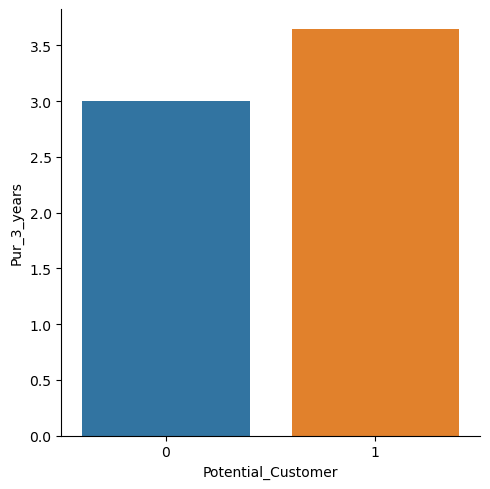

<Figure size 640x480 with 0 Axes>

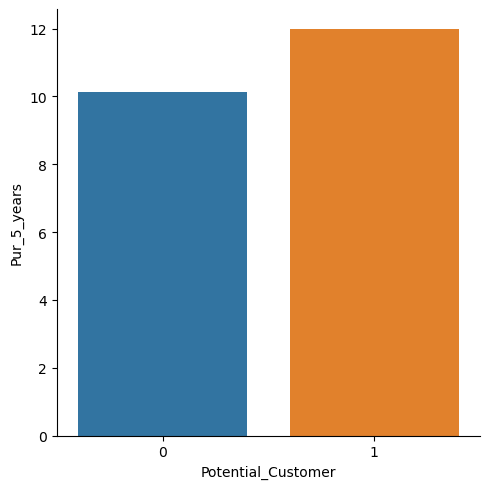

<Figure size 640x480 with 0 Axes>

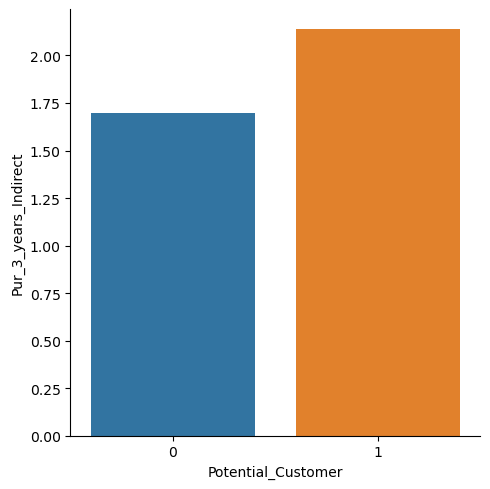

<Figure size 640x480 with 0 Axes>

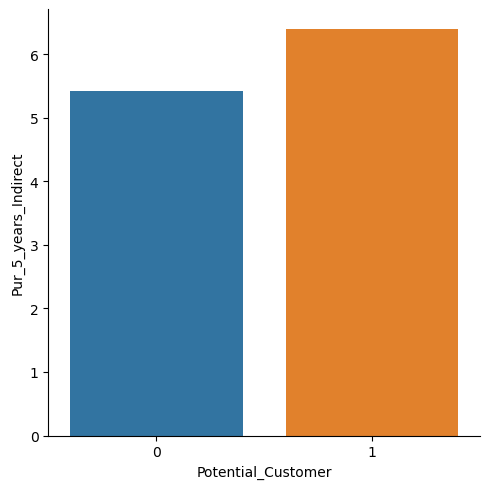

<Figure size 640x480 with 0 Axes>

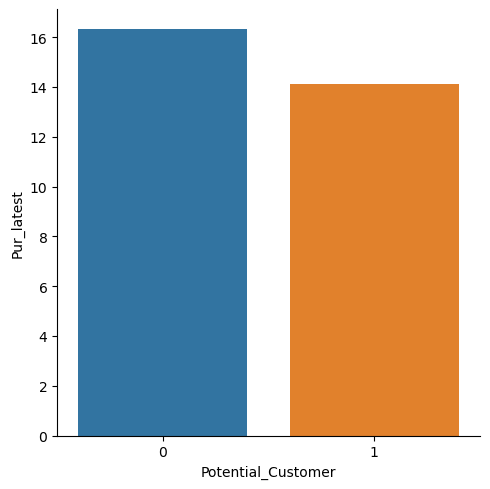

<Figure size 640x480 with 0 Axes>

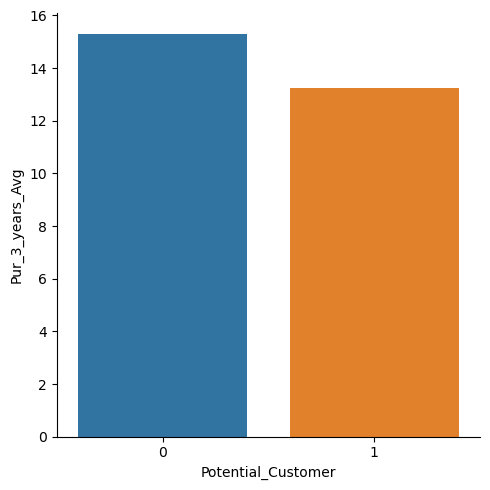

<Figure size 640x480 with 0 Axes>

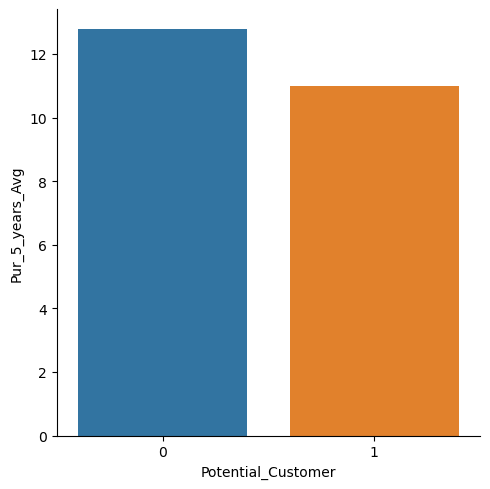

<Figure size 640x480 with 0 Axes>

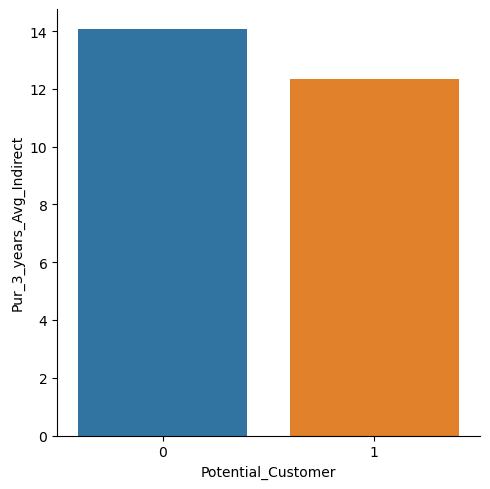

<Figure size 640x480 with 0 Axes>

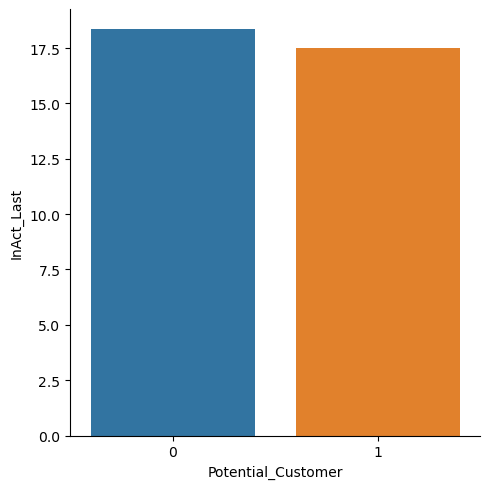

<Figure size 640x480 with 0 Axes>

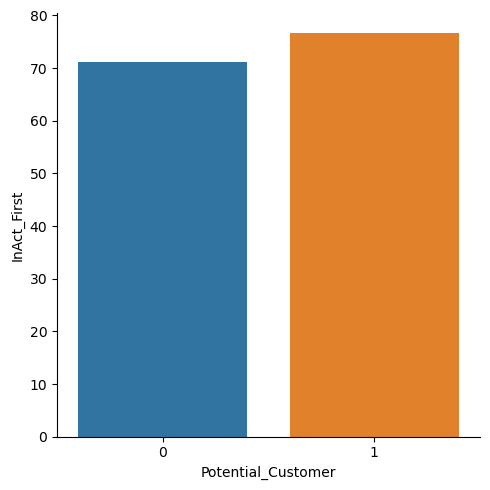

<Figure size 640x480 with 0 Axes>

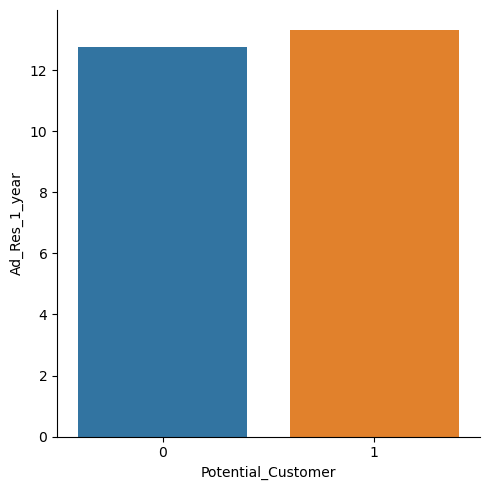

<Figure size 640x480 with 0 Axes>

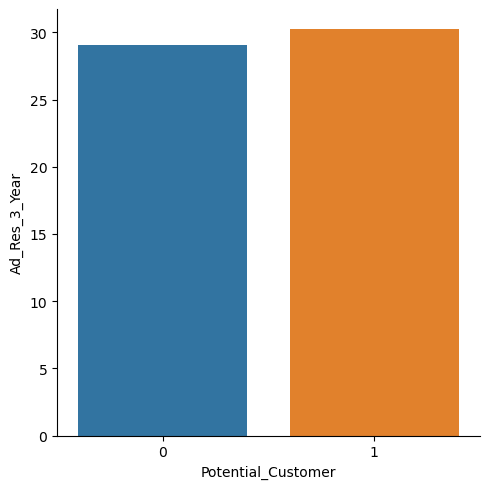

<Figure size 640x480 with 0 Axes>

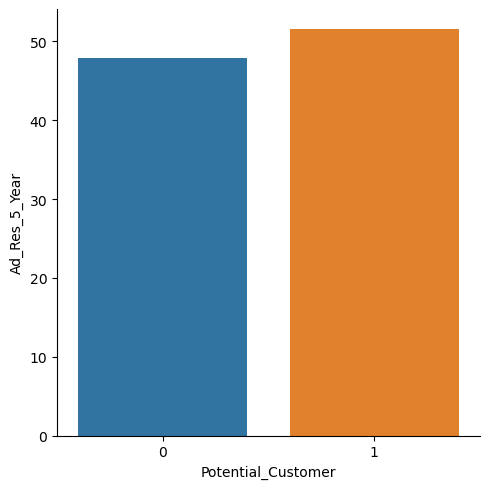

<Figure size 640x480 with 0 Axes>

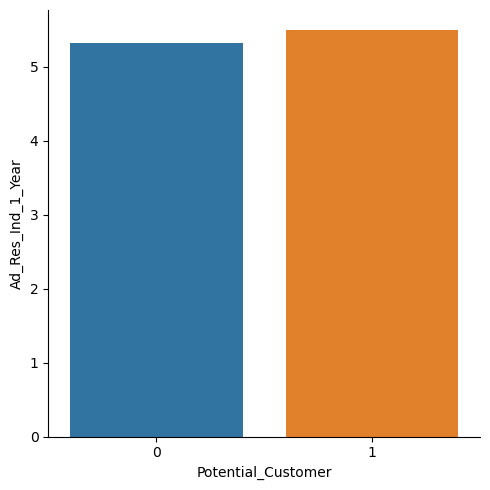

<Figure size 640x480 with 0 Axes>

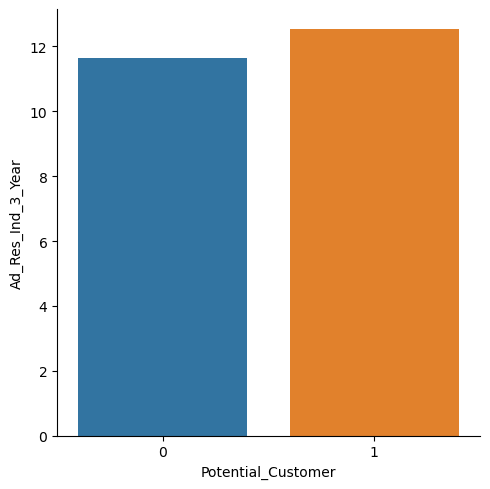

<Figure size 640x480 with 0 Axes>

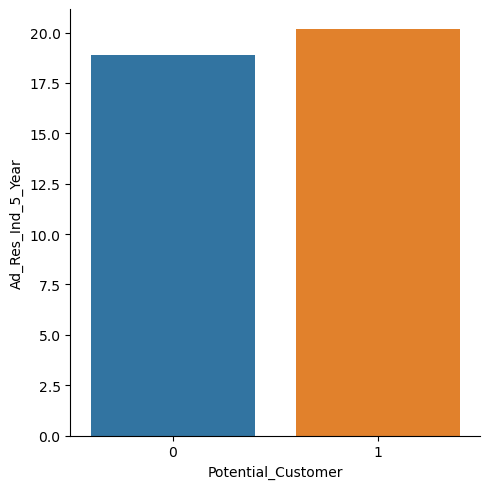

<Figure size 640x480 with 0 Axes>

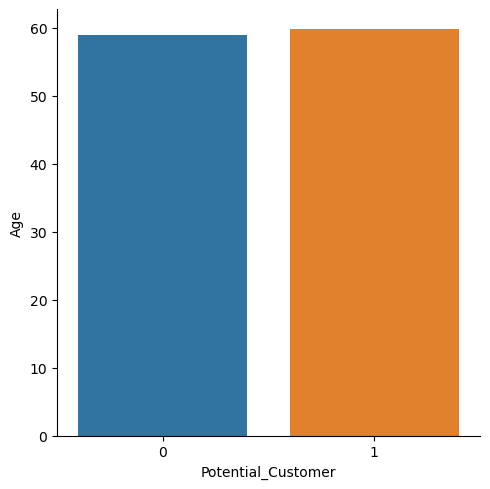

<Figure size 640x480 with 0 Axes>

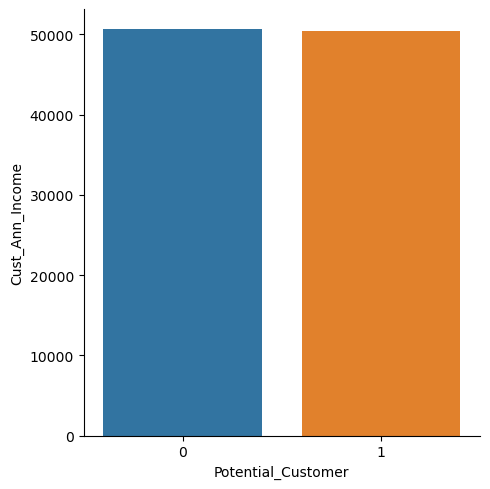

In [50]:
for i,x in enumerate(customers[numerical]):
    plt.figure(i)
    ax = sns.catplot(data = customers, y = x, x='Potential_Customer', kind='bar',ci=None )
    plt.show()

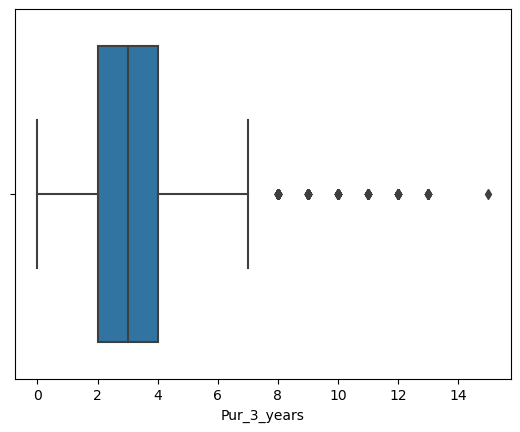

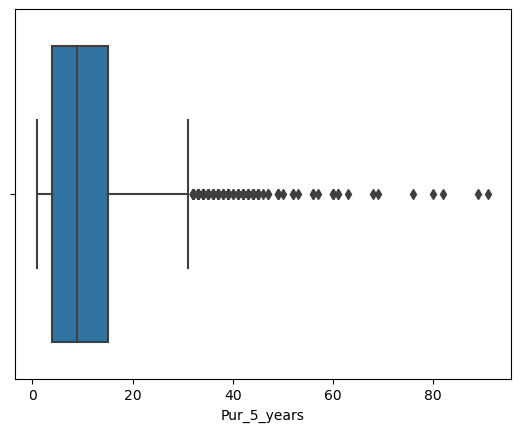

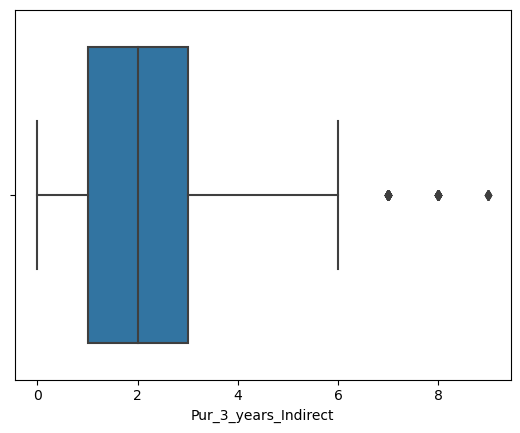

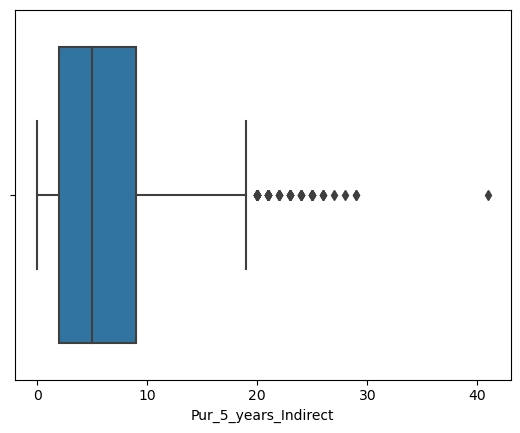

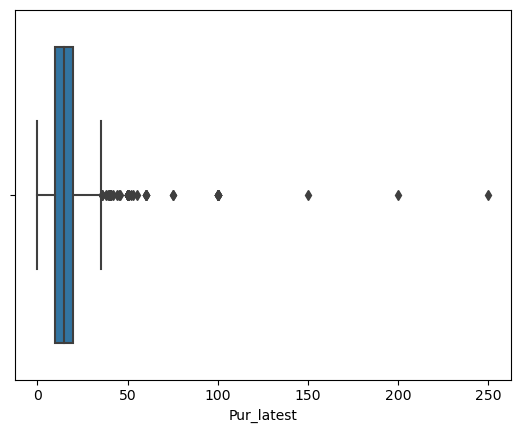

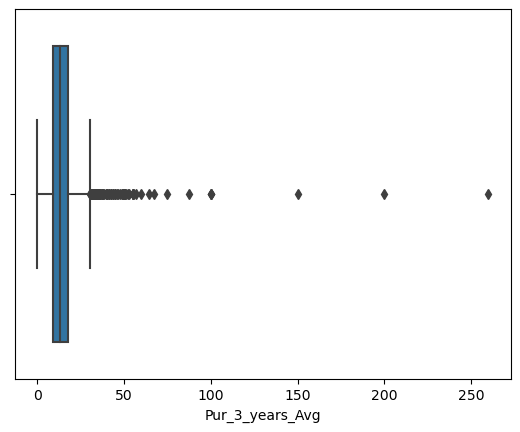

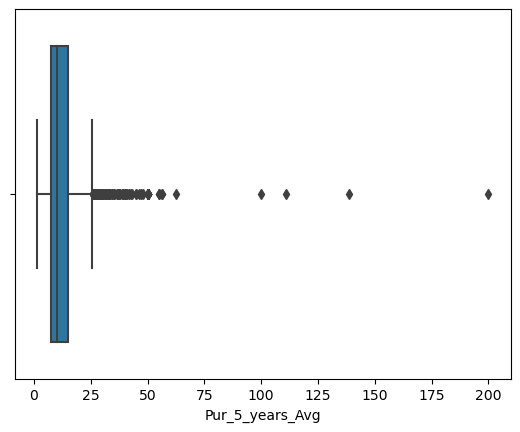

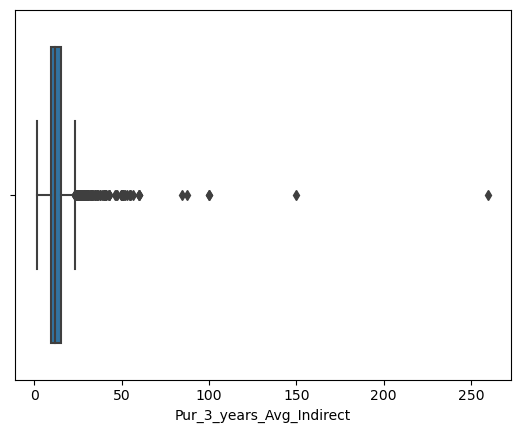

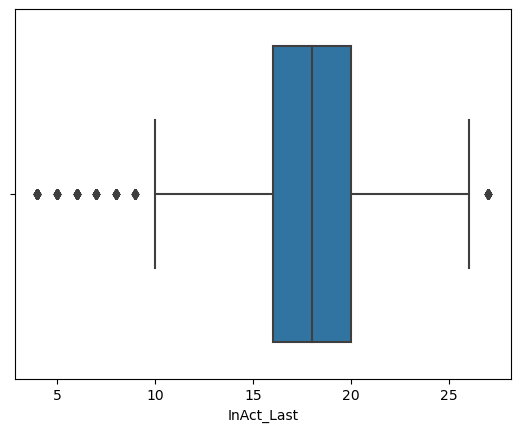

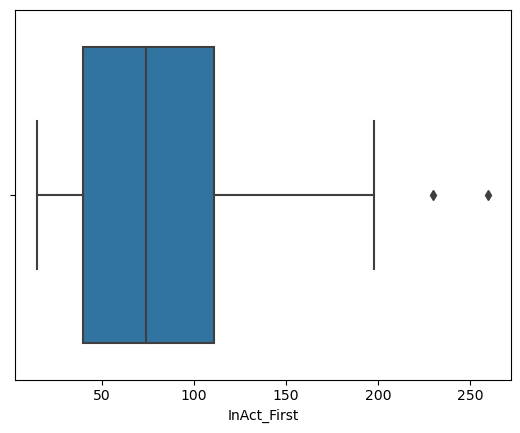

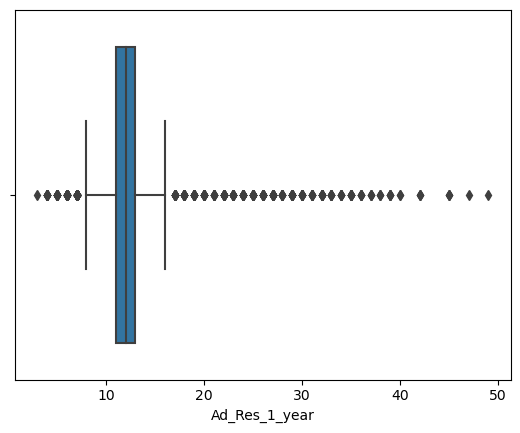

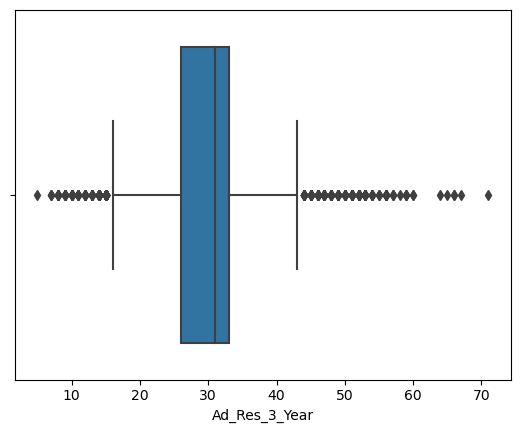

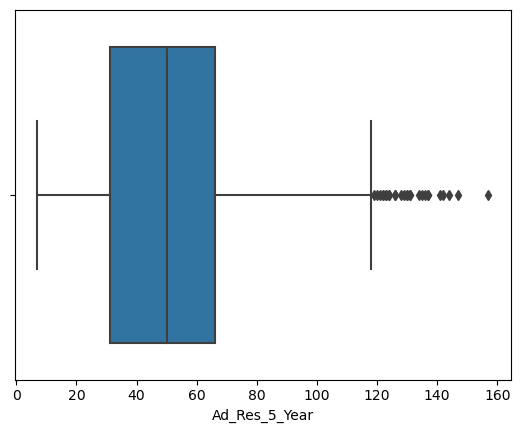

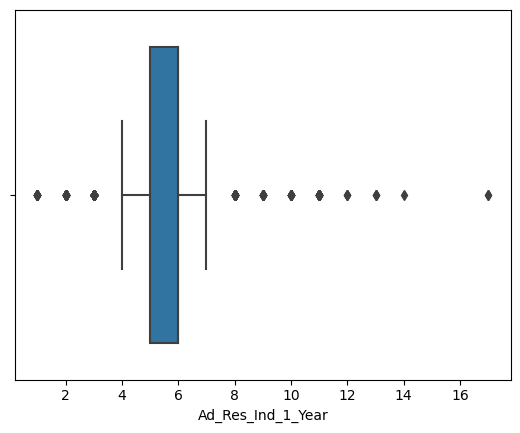

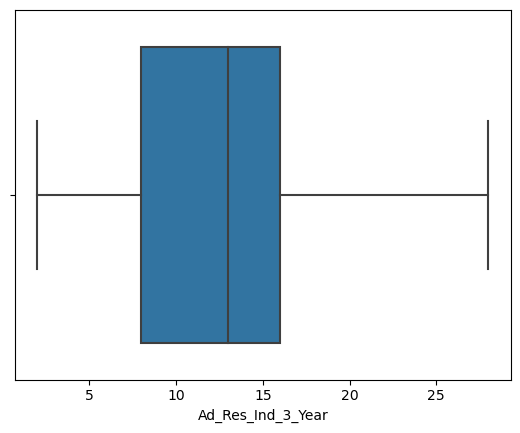

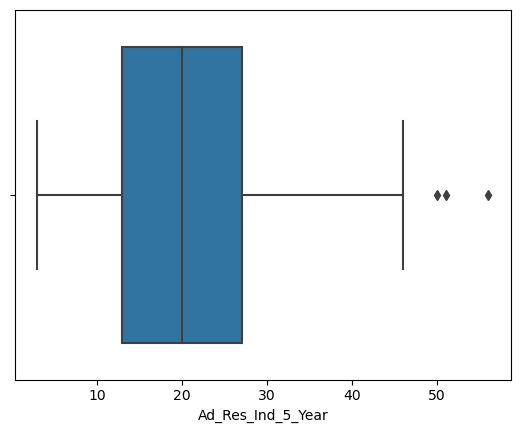

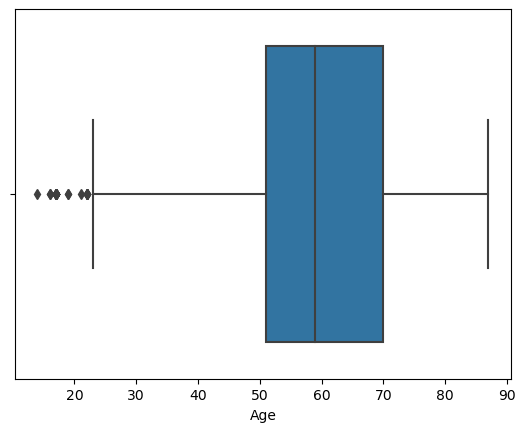

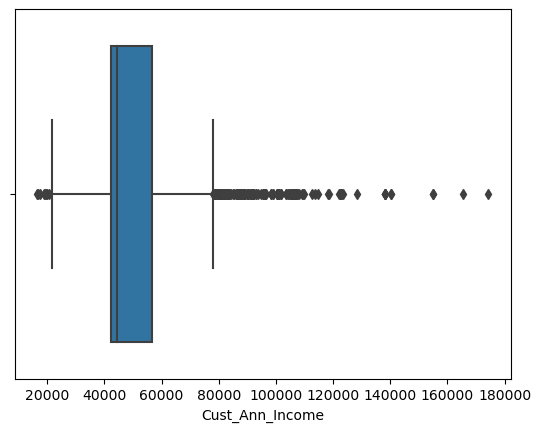

In [51]:
for i,x in enumerate(customers[numerical]):
    plt.figure(i)
    ax = sns.boxplot(data = customers, x = x)

# <font color=red>Insights through data visualization<font>
    
### Visualization of potential customer breakdown

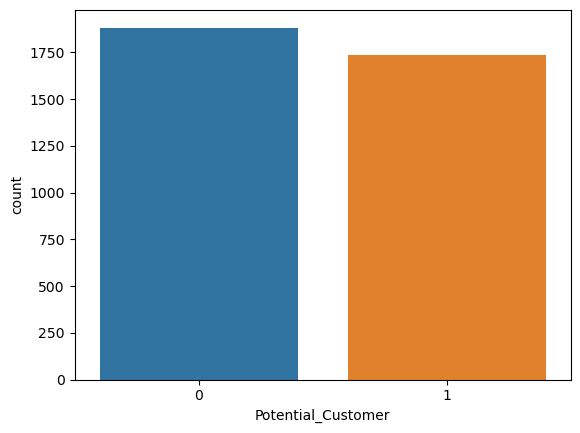

In [52]:
sns.countplot(data = customers, x = 'Potential_Customer')
plt.show()

<AxesSubplot:title={'center':'Pie Chart of Potential Customer'}, ylabel='Potential_Customer'>

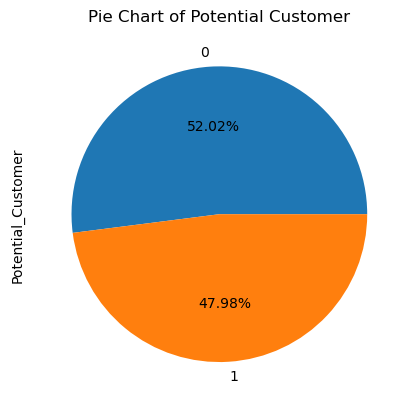

In [53]:
customers.Potential_Customer.value_counts().plot.pie(autopct='%1.2f%%',
                                     title = "Pie Chart of Potential Customer")

### Visualization for distribution of the customer's Age 

Text(0.5, 1.0, 'Customer Age Distribution')

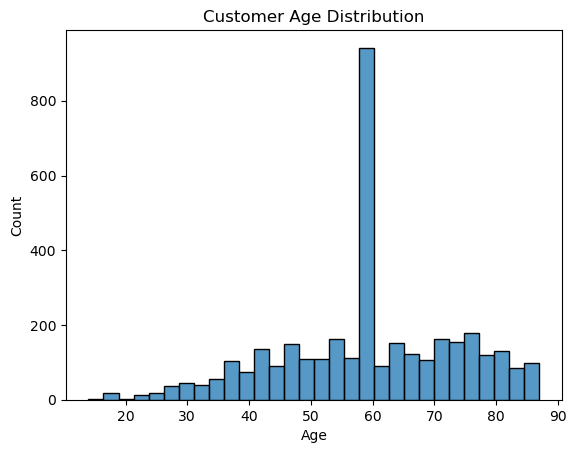

In [54]:
sns.histplot(customers['Age'], palette=['yellow', 'green'] ).set_title('Customer Age Distribution')

Text(0.5, 1.0, 'Customer Age Distribution')

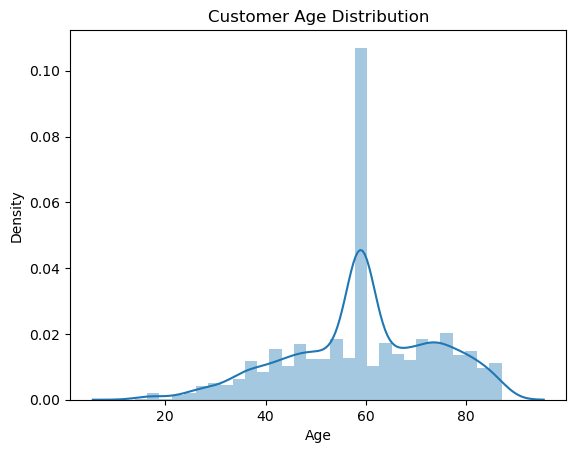

In [55]:
sns.distplot(customers['Age'], hist = True, kde = True ).set_title('Customer Age Distribution') 

In [56]:
customers['Age'].skew()

-0.31281921333661317

In [57]:
customers['Age'].kurt()

-0.15250544212414896

The distribution of customer's age is normal distribution as the value of skewness indicate data is fairly symmetrical. 

### Visualization of other features (such as customer annual income, distribution of gender)

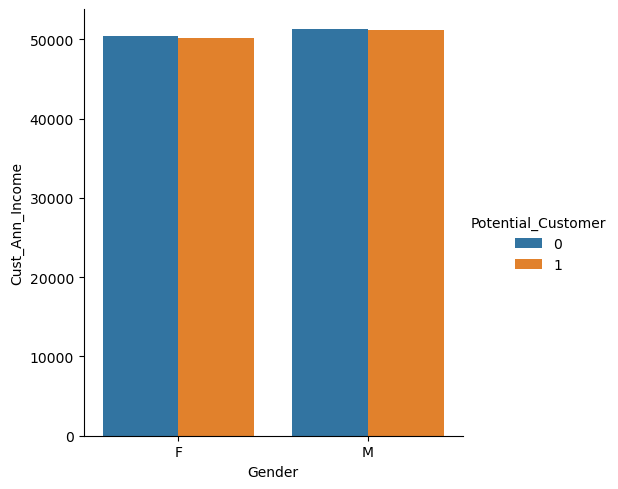

In [58]:
sns.catplot(y='Cust_Ann_Income', x='Gender', kind='bar', hue='Potential_Customer', ci=None, data=customers)

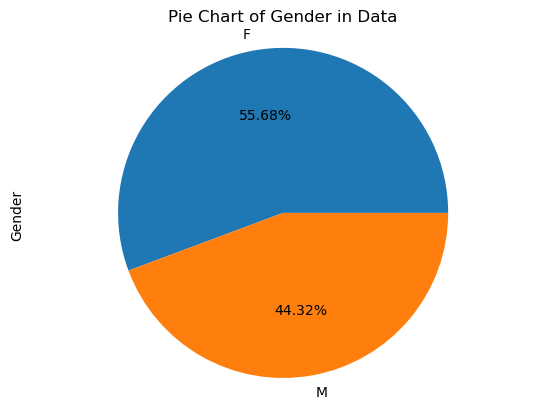

In [59]:
customers.Gender.value_counts().plot.pie(autopct='%1.2f%%',
                                     title = "Pie Chart of Gender in Data")

plt.axis('equal')
plt.show()

### Distribution of customers' last purchase

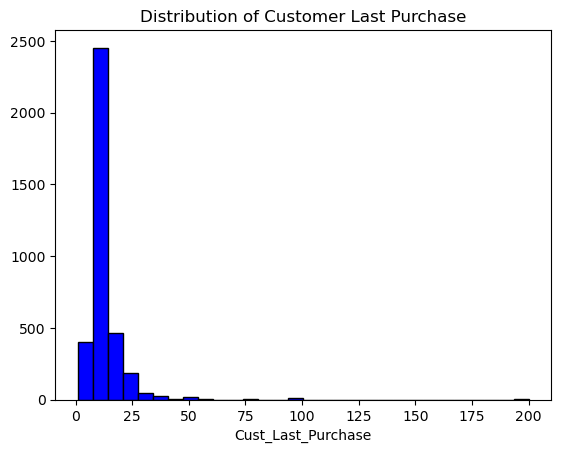

In [60]:
plt.hist(customers['Cust_Last_Purchase'],color ='blue', edgecolor='black', bins=30)
plt.xlabel('Cust_Last_Purchase')
plt.title('Distribution of Customer Last Purchase')
plt.show()

### Purchase amount pattern with regards to Gender

In [61]:
purchase_amount = ['Pur_3_years','Pur_5_years','Pur_3_years_Indirect', 'Pur_5_years_Indirect', 'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg', 'Pur_3_years_Avg_Indirect']

<Figure size 640x480 with 0 Axes>

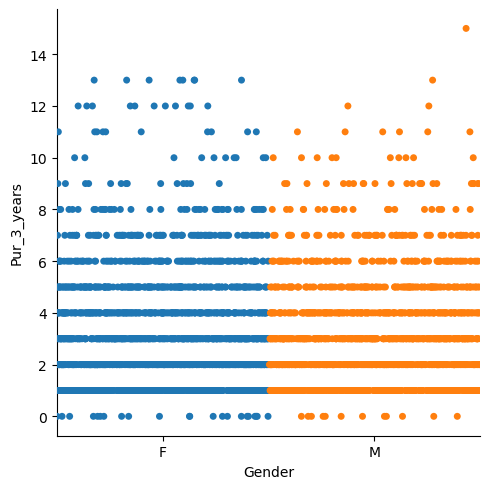

<Figure size 640x480 with 0 Axes>

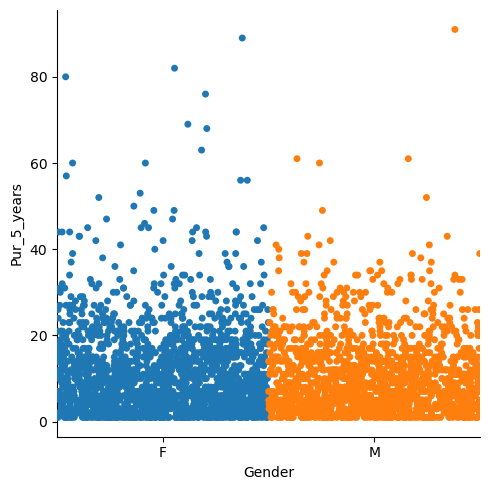

<Figure size 640x480 with 0 Axes>

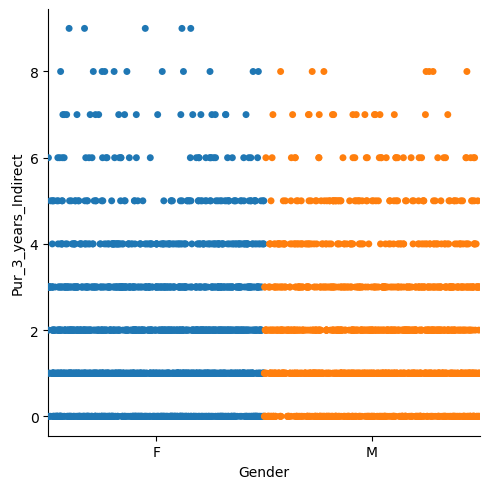

<Figure size 640x480 with 0 Axes>

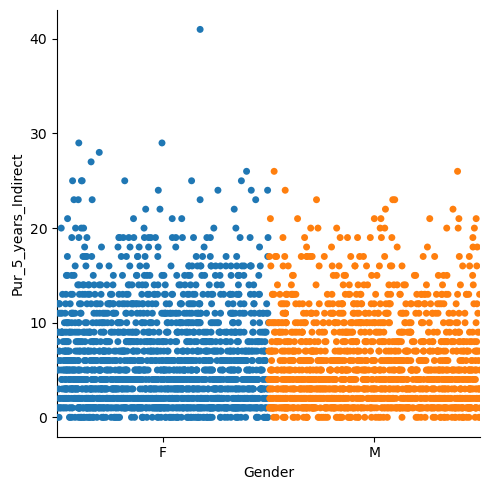

<Figure size 640x480 with 0 Axes>

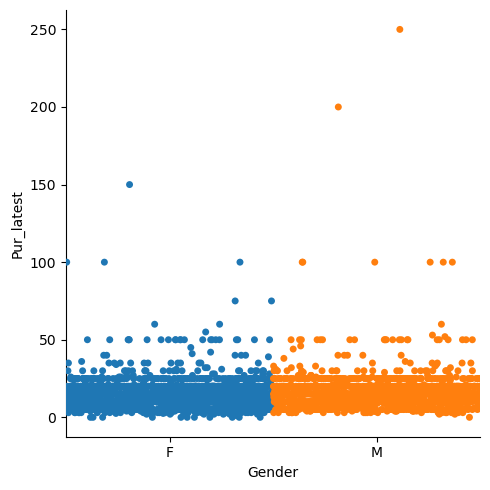

<Figure size 640x480 with 0 Axes>

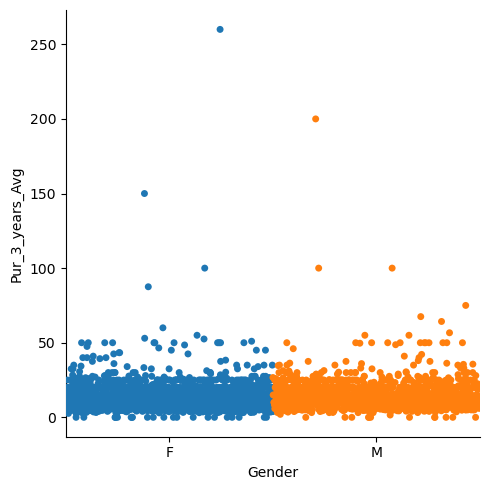

<Figure size 640x480 with 0 Axes>

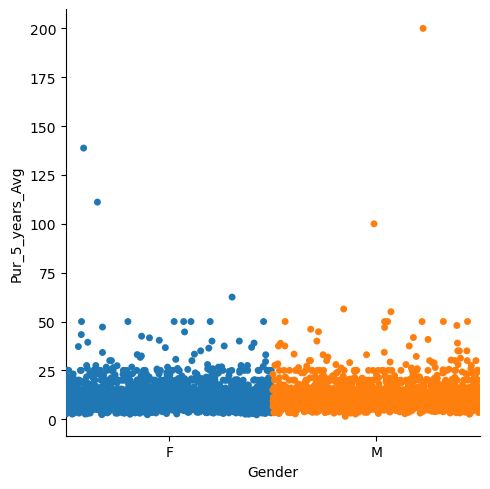

<Figure size 640x480 with 0 Axes>

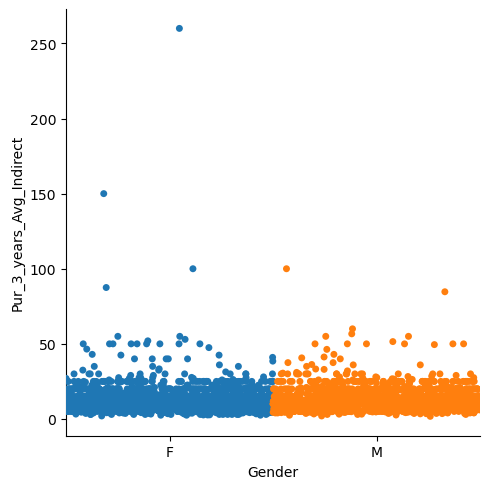

In [62]:
for i,x in enumerate(customers[purchase_amount]):
    plt.figure(i)
    ax = sns.catplot(data = customers, y = x, x='Gender', jitter = 0.5)
    #ax = sns.catplot(data = customers, y = x, x='Gender', kind='bar',ci=None )
    plt.show()

### Insight 
On average, male has the higher latest purchase amount compared to female

### Distribution of the status of the customers

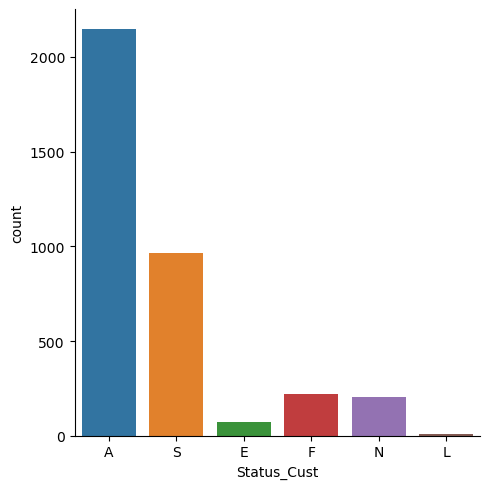

In [63]:
sns.catplot(x="Status_Cust", kind='count', data=customers)

### Insights

Based on the graph, the customers mostly is active and star buyer. The inactive and lapsing buyer is the least.

### Average number of purchase made in the last 3 years among different customer status

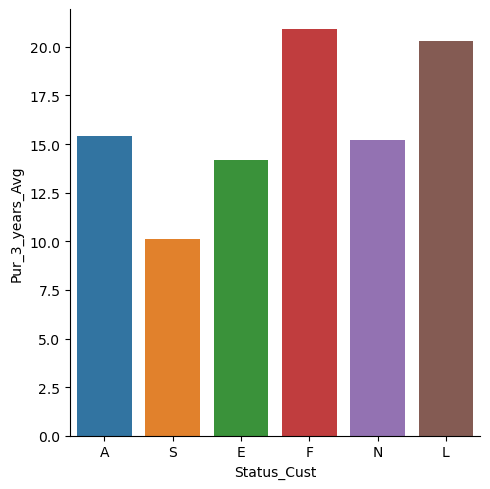

In [64]:
sns.catplot(y="Pur_3_years_Avg", x="Status_Cust", kind="bar", ci=None ,data=customers)

### Insights

From graph above, from the 3 years of average purchase, lapsing buyer has the higher count compared to active and star buyer. This can be the indicator to shows us that lapsing buyer have become our active buyer if we compared this graph with previous graph.

### Average number of purchase made in the last 5 years among different customer status

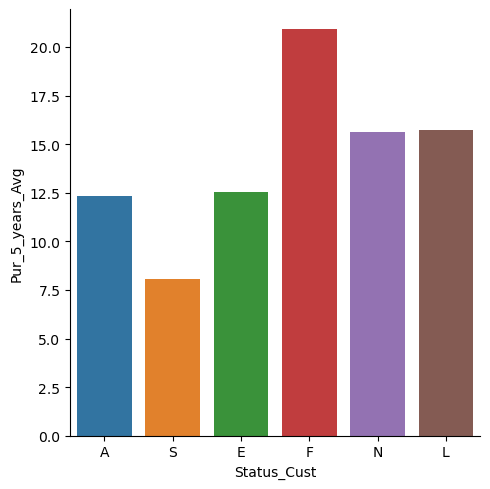

In [65]:
sns.catplot(y="Pur_5_years_Avg", x="Status_Cust", kind="bar", ci=None ,data=customers)

### Insights

From graph above, the first time customers has the highest count. It can be concluded that this company was established 5 years ago so that is why the amount of first time customer is highest. This alco can explain why the active and star buyer has the lowest count.

### What is the distribution of the inactive number of months since last purchase?

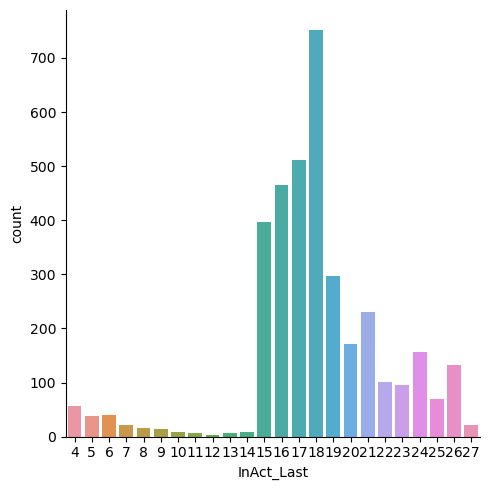

In [66]:
sns.catplot(x="InAct_Last", kind='count', data=customers)

### Insights

inAct-Last mean inactive no of months since the customers made the last purchase. From the graph above, we can see that the graph is negatively skewed. Most customers been inactive from the month 14 and it reaches the highest on month 18..

### What is the average number of purchase made in the last 3 years among different gender

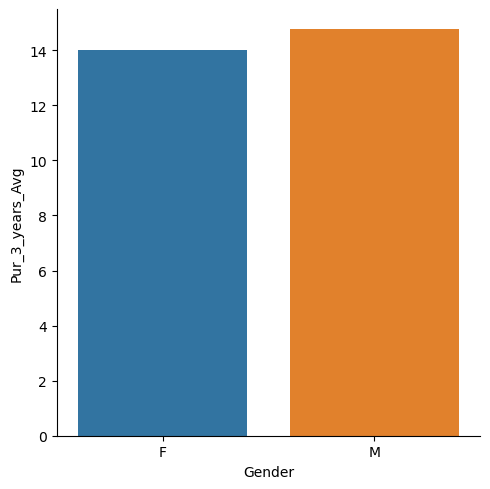

In [67]:
sns.catplot(y="Pur_3_years_Avg", x="Gender", kind="bar",ci=None, data=customers)

### Insights

For the 3 years average purchase, we can see that male has higher average purchase amount compared to female.

### Check the distribution of customers who responded to ads in past 5 years with By Gender

#### Plot By gender

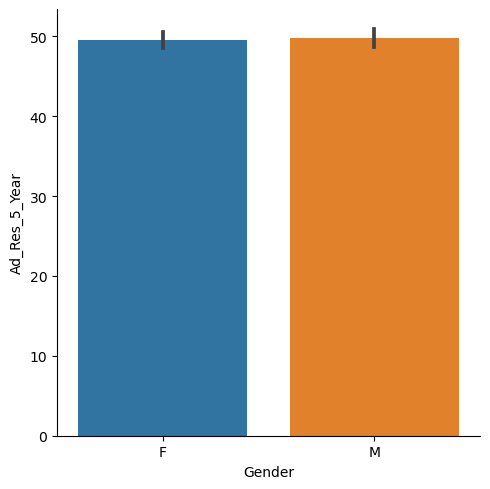

In [68]:
sns.catplot(x='Gender', y='Ad_Res_5_Year', kind='bar', data=customers)

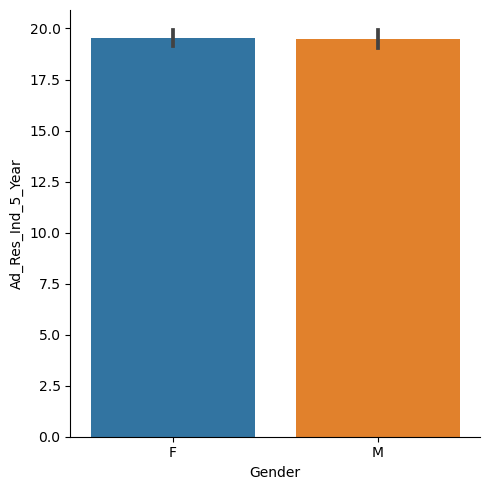

In [69]:
sns.catplot(x='Gender', y='Ad_Res_Ind_5_Year', kind='bar', data=customers)

#### Plot By Customer Status

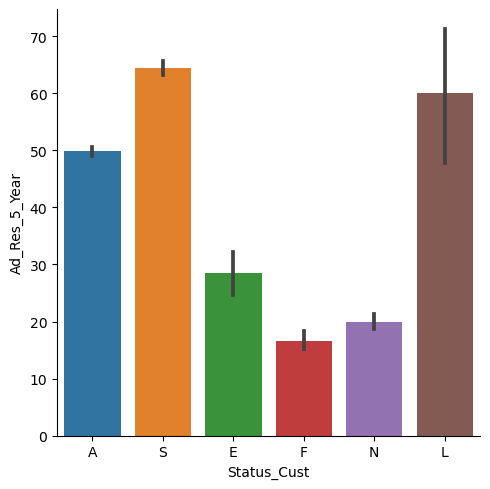

In [70]:
sns.catplot(x="Status_Cust", y='Ad_Res_5_Year', kind='bar', data=customers)

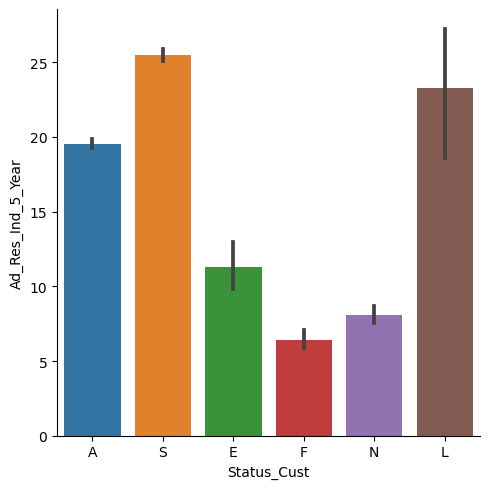

In [71]:
sns.catplot(x="Status_Cust", y='Ad_Res_Ind_5_Year', kind='bar', data=customers)

#### Plot By House Ownership

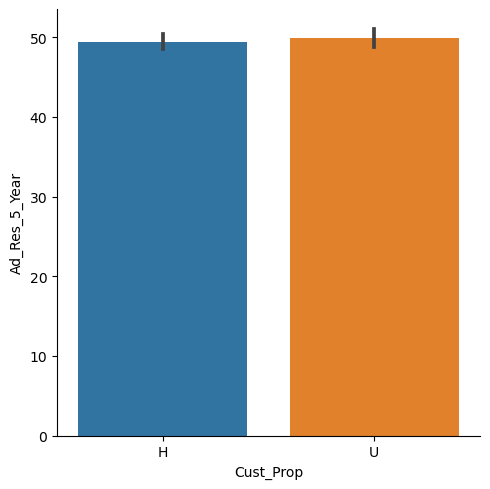

In [72]:
sns.catplot(x='Cust_Prop', y='Ad_Res_5_Year', kind='bar', data=customers)

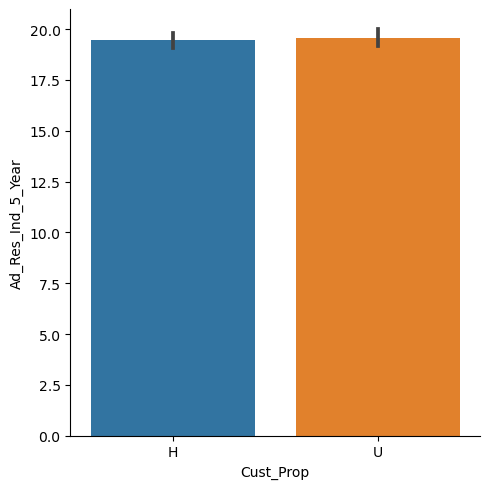

In [73]:
sns.catplot(x='Cust_Prop', y='Ad_Res_Ind_5_Year', kind='bar', data=customers)

### Insights

1. The is no significant differences by Gender for customers who responded to ads in past 5 years.
2. Star buyer (S) is the customer's status that most responded to the ads in past 5 years 
3. The is no significant differences by cust_prop for customers who responded to ads in past 5 years.

# <font color=red>Feature Engineering<font>
    
### We have too many Features so we need to combine some features to ease our analysis. 

In [74]:
customers.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,5.0,2.0,17.0,2.0,4.0,0.0,7.50,7.76,7.50,14,110,32,48,73,3,12,16,A,0,71.000000,F,H,65957.0
1,1,87939,30.0,1.0,7.0,0.0,3.0,25.0,25.00,13.00,11.67,18,75,13,35,55,6,6,22,A,1,59.018761,M,U,44284.5
2,0,88003,11.0,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.67,19,57,14,35,53,6,17,22,S,1,79.000000,F,U,44284.5
3,1,188721,20.0,1.0,11.0,0.0,3.0,20.0,20.00,12.45,11.67,5,113,17,38,71,8,8,33,A,0,73.000000,F,U,76293.0
4,1,88056,5.0,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.00,17,118,13,28,63,6,12,24,S,1,68.000000,F,H,113663.0


In [75]:
# Create new column by adding Total Purchase direct-indirect
customers_modified = customers.copy()
customers_modified["Pur_3_years_Total"] = customers_modified['Pur_3_years'] + customers_modified['Pur_3_years_Indirect']
customers_modified["Pur_5_years_Total"] = customers_modified['Pur_5_years'] + customers_modified['Pur_5_years_Indirect']
customers_modified["Pur_3_years_Avg_Total"] = customers_modified['Pur_3_years_Avg'] + customers_modified['Pur_3_years_Avg_Indirect']

# Create new column by adding Total Ads direct-indirect
customers_modified["Ad_Res_1_Year_Total"] = customers_modified['Ad_Res_1_year'] + customers_modified['Ad_Res_Ind_1_Year']
customers_modified["Ad_Res_3_Year_Total"] = customers_modified['Ad_Res_3_Year'] + customers_modified['Ad_Res_Ind_3_Year']
customers_modified["Ad_Res_5_Year_Total"] = customers_modified['Ad_Res_5_Year'] + customers_modified['Ad_Res_Ind_5_Year']

customers_modified.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Pur_3_years_Total,Pur_5_years_Total,Pur_3_years_Avg_Total,Ad_Res_1_Year_Total,Ad_Res_3_Year_Total,Ad_Res_5_Year_Total
0,1,9946,5.0,2.0,17.0,2.0,4.0,0.0,7.50,7.76,7.50,14,110,32,48,73,3,12,16,A,0,71.000000,F,H,65957.0,4.0,21.0,15.00,35,60,89
1,1,87939,30.0,1.0,7.0,0.0,3.0,25.0,25.00,13.00,11.67,18,75,13,35,55,6,6,22,A,1,59.018761,M,U,44284.5,1.0,10.0,36.67,19,41,77
2,0,88003,11.0,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.67,19,57,14,35,53,6,17,22,S,1,79.000000,F,U,44284.5,8.0,17.0,29.67,20,52,75
3,1,188721,20.0,1.0,11.0,0.0,3.0,20.0,20.00,12.45,11.67,5,113,17,38,71,8,8,33,A,0,73.000000,F,U,76293.0,1.0,14.0,31.67,25,46,104
4,1,88056,5.0,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.00,17,118,13,28,63,6,12,24,S,1,68.000000,F,H,113663.0,5.0,22.0,8.33,19,40,87


In [76]:
# Drop column

columns_to_drop = ["Pur_3_years", "Pur_3_years_Indirect", "Pur_3_years_Avg", "Pur_3_years_Avg_Indirect", "Pur_5_years", "Pur_5_years_Indirect", "Ad_Res_1_year", "Ad_Res_Ind_1_Year", "Ad_Res_3_Year", "Ad_Res_Ind_3_Year", "Ad_Res_5_Year", "Ad_Res_Ind_5_Year"]

for col in columns_to_drop:
    customers_modified.drop(col, axis=1, inplace=True)
    
customers_modified.head()


,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_latest,Pur_5_years_Avg,InAct_Last,InAct_First,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Pur_3_years_Total,Pur_5_years_Total,Pur_3_years_Avg_Total,Ad_Res_1_Year_Total,Ad_Res_3_Year_Total,Ad_Res_5_Year_Total
0,1,9946,5.0,0.0,7.76,14,110,A,0,71.000000,F,H,65957.0,4.0,21.0,15.00,35,60,89
1,1,87939,30.0,25.0,13.00,18,75,A,1,59.018761,M,U,44284.5,1.0,10.0,36.67,19,41,77
2,0,88003,11.0,15.0,11.25,19,57,S,1,79.000000,F,U,44284.5,8.0,17.0,29.67,20,52,75
3,1,188721,20.0,20.0,12.45,5,113,A,0,73.000000,F,U,76293.0,1.0,14.0,31.67,25,46,104
4,1,88056,5.0,3.0,3.80,17,118,S,1,68.000000,F,H,113663.0,5.0,22.0,8.33,19,40,87


In [77]:
customers_modified.to_csv("data_new.csv")

In [78]:
customers_new = pd.read_csv('../data/data_new.csv' , index_col = 'Unnamed: 0')

In [79]:
customers_new.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_latest,Pur_5_years_Avg,InAct_Last,InAct_First,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Pur_3_years_Total,Pur_5_years_Total,Pur_3_years_Avg_Total,Ad_Res_1_Year_Total,Ad_Res_3_Year_Total,Ad_Res_5_Year_Total
0,1,9946,5.0,0.0,7.76,14,110,A,0,71.000000,F,H,65957.0,4.0,21.0,15.00,35,60,89
1,1,87939,30.0,25.0,13.00,18,75,A,1,59.018761,M,U,44284.5,1.0,10.0,36.67,19,41,77
2,0,88003,11.0,15.0,11.25,19,57,S,1,79.000000,F,U,44284.5,8.0,17.0,29.67,20,52,75
3,1,188721,20.0,20.0,12.45,5,113,A,0,73.000000,F,U,76293.0,1.0,14.0,31.67,25,46,104
4,1,88056,5.0,3.0,3.80,17,118,S,1,68.000000,F,H,113663.0,5.0,22.0,8.33,19,40,87


In [80]:
customers_new.dtypes

Potential_Customer         int64
C_ID                       int64
Cust_Last_Purchase       float64
Pur_latest               float64
Pur_5_years_Avg          float64
InAct_Last                 int64
InAct_First                int64
Status_Cust               object
Status_Latest_Ad           int64
Age                      float64
Gender                    object
Cust_Prop                 object
Cust_Ann_Income          float64
Pur_3_years_Total        float64
Pur_5_years_Total        float64
Pur_3_years_Avg_Total    float64
Ad_Res_1_Year_Total        int64
Ad_Res_3_Year_Total        int64
Ad_Res_5_Year_Total        int64
dtype: object

# <font color=red>Feature Selection<font>

### Check the correlation among the variables

In [81]:
correlation_matrix = customers_new.corr()
correlation_matrix

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_latest,Pur_5_years_Avg,InAct_Last,InAct_First,Status_Latest_Ad,Age,Cust_Ann_Income,Pur_3_years_Total,Pur_5_years_Total,Pur_3_years_Avg_Total,Ad_Res_1_Year_Total,Ad_Res_3_Year_Total,Ad_Res_5_Year_Total
Potential_Customer,1.000000,0.008588,0.216644,-0.101008,-0.111500,-0.103023,0.070813,0.110590,0.030281,-0.006616,0.147820,0.100252,-0.105430,0.059448,0.093729,0.079065
C_ID,0.008588,1.000000,-0.025277,-0.028949,-0.034537,0.011923,-0.033071,-0.046653,-0.025159,0.032019,-0.038032,-0.077321,-0.002178,-0.343865,-0.209841,-0.166728
Cust_Last_Purchase,0.216644,-0.025277,1.000000,0.541455,0.377203,0.053657,-0.074114,-0.128234,-0.036530,0.061955,-0.192060,-0.134161,0.414820,0.055715,-0.013119,-0.042206
Pur_latest,-0.101008,-0.028949,0.541455,1.000000,0.747429,0.132908,-0.142707,-0.273792,-0.056524,0.097159,-0.340020,-0.268433,0.750406,0.028267,-0.069836,-0.112142
Pur_5_years_Avg,-0.111500,-0.034537,0.377203,0.747429,1.000000,0.082255,-0.297026,-0.360026,-0.089861,0.098418,-0.350538,-0.354806,0.839243,0.062743,-0.135882,-0.230799
InAct_Last,-0.103023,0.011923,0.053657,0.132908,0.082255,1.000000,-0.082802,-0.147530,-0.089413,0.027797,-0.216885,-0.217339,0.084130,-0.552528,-0.313943,-0.214102
InAct_First,0.070813,-0.033071,-0.074114,-0.142707,-0.297026,-0.082802,1.000000,0.524103,0.223080,-0.059468,0.171481,0.738348,-0.122506,0.152712,0.384301,0.878249
Status_Latest_Ad,0.110590,-0.046653,-0.128234,-0.273792,-0.360026,-0.147530,0.524103,1.000000,0.148515,-0.070713,0.461088,0.614477,-0.259981,0.182493,0.397093,0.562739
Age,0.030281,-0.025159,-0.036530,-0.056524,-0.089861,-0.089413,0.223080,0.148515,1.000000,-0.069037,0.060012,0.181989,-0.048791,0.095945,0.108071,0.208656
Cust_Ann_Income,-0.006616,0.032019,0.061955,0.097159,0.098418,0.027797,-0.059468,-0.070713,-0.069037,1.000000,-0.056710,-0.064001,0.089492,0.017720,0.003302,-0.034850


### Create a Heatmap of correlation between the variables

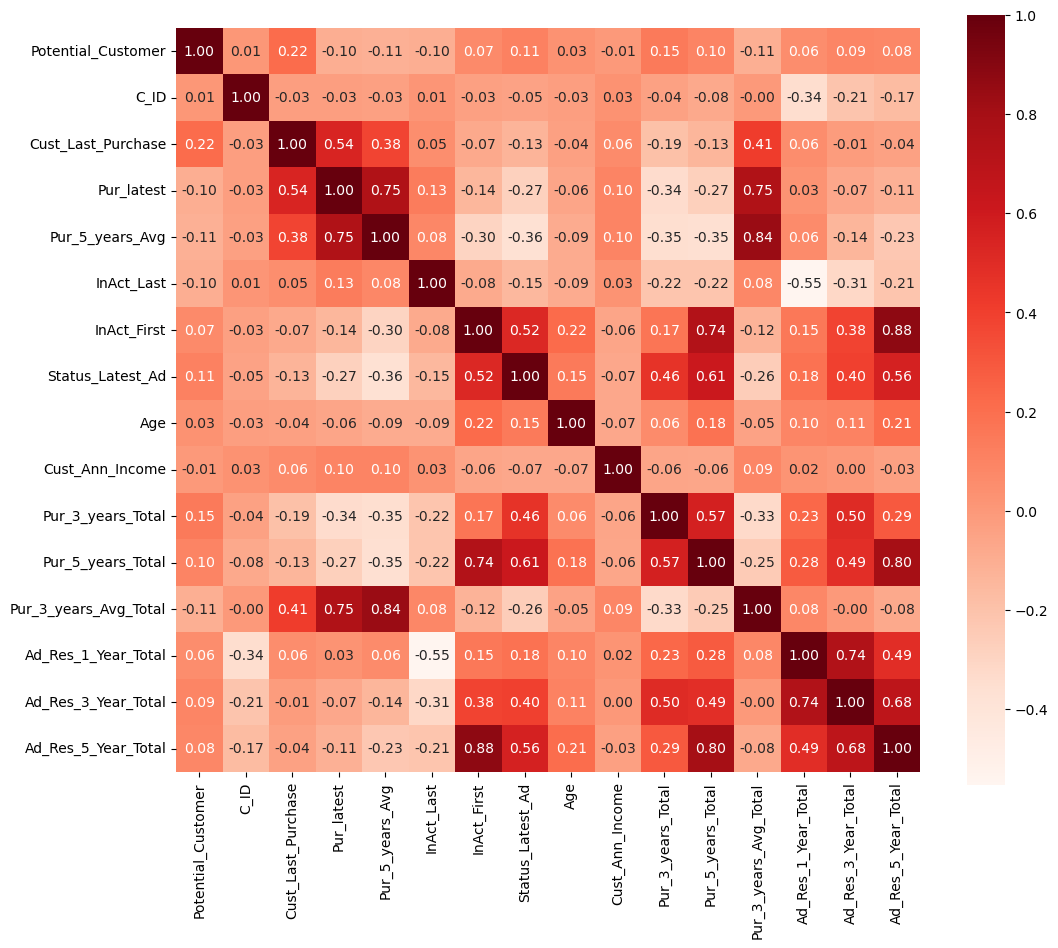

In [82]:
plt.subplots(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt='0.2f', square=True, cmap="Reds");

In [83]:
corr_pairs = correlation_matrix.unstack()
corr_pairs.head()

Potential_Customer  Potential_Customer    1.000000
                    C_ID                  0.008588
                    Cust_Last_Purchase    0.216644
                    Pur_latest           -0.101008
                    Pur_5_years_Avg      -0.111500
dtype: float64

In [84]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

InAct_Last           Ad_Res_1_Year_Total   -0.552528
Ad_Res_1_Year_Total  InAct_Last            -0.552528
Status_Latest_Ad     Pur_5_years_Avg       -0.360026
Pur_5_years_Avg      Status_Latest_Ad      -0.360026
Pur_5_years_Total    Pur_5_years_Avg       -0.354806
dtype: float64

In [85]:
high_corr = sorted_pairs[(sorted_pairs) > 0.8]
high_corr

Pur_3_years_Avg_Total  Pur_5_years_Avg          0.839243
Pur_5_years_Avg        Pur_3_years_Avg_Total    0.839243
Ad_Res_5_Year_Total    InAct_First              0.878249
InAct_First            Ad_Res_5_Year_Total      0.878249
Potential_Customer     Potential_Customer       1.000000
Ad_Res_1_Year_Total    Ad_Res_1_Year_Total      1.000000
Pur_3_years_Avg_Total  Pur_3_years_Avg_Total    1.000000
Pur_5_years_Total      Pur_5_years_Total        1.000000
Pur_3_years_Total      Pur_3_years_Total        1.000000
Cust_Ann_Income        Cust_Ann_Income          1.000000
Age                    Age                      1.000000
Status_Latest_Ad       Status_Latest_Ad         1.000000
InAct_First            InAct_First              1.000000
InAct_Last             InAct_Last               1.000000
Pur_5_years_Avg        Pur_5_years_Avg          1.000000
Pur_latest             Pur_latest               1.000000
Cust_Last_Purchase     Cust_Last_Purchase       1.000000
C_ID                   C_ID    

### Insights
Based on heat maps, the features that have high correlations are Pur_3_years_Avg_Total, Pur_5_years_Avg Pur_5_years_Avg    Pur_3_years_Avg_Total, Ad_Res_5_Year_Total, InAct_First, InAct_First and Ad_Res_5_Year_Total. This is the area that company should look more in depth to understand customers behavior.

### Find the Numerical Summary statistics for the variables such as mean, median, mode

In [86]:
customers_new.describe()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_latest,Pur_5_years_Avg,InAct_Last,InAct_First,Status_Latest_Ad,Age,Cust_Ann_Income,Pur_3_years_Total,Pur_5_years_Total,Pur_3_years_Avg_Total,Ad_Res_1_Year_Total,Ad_Res_3_Year_Total,Ad_Res_5_Year_Total
count,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.00000,3618.000000,3618.000000
mean,0.479823,70151.997236,12.707090,15.267344,11.913532,17.934218,73.807352,0.568546,59.294426,50519.650636,5.217800,16.906302,27.541794,18.43560,41.663074,69.122167
std,0.499662,35499.154163,8.205478,10.794970,8.046675,4.145219,38.127214,0.495348,14.437137,16007.107051,3.660472,14.000506,18.040904,5.92711,11.168653,31.064605
min,0.000000,12.000000,1.000000,0.000000,1.500000,4.000000,15.000000,0.000000,14.000000,16564.000000,0.000000,1.000000,3.300000,4.00000,7.000000,10.000000
25%,0.000000,50146.500000,11.000000,10.000000,7.500000,16.000000,40.000000,0.000000,51.000000,42274.500000,2.000000,6.000000,18.042500,16.00000,35.000000,43.000000
50%,0.000000,68694.000000,11.000000,15.000000,10.295000,18.000000,74.000000,1.000000,59.018761,44285.750000,4.000000,13.000000,25.170000,18.00000,43.000000,70.000000
75%,1.000000,87779.500000,11.000000,20.000000,14.787500,20.000000,111.000000,1.000000,70.000000,56508.000000,7.000000,24.000000,32.000000,19.00000,49.000000,93.000000
max,1.000000,191672.000000,200.000000,250.000000,200.000000,27.000000,260.000000,1.000000,87.000000,174305.000000,22.000000,130.000000,520.000000,66.00000,99.000000,200.000000


### Check for outliers by either plotting box plots or IQR For all numerical variables

In [87]:
customers_new.dtypes

Potential_Customer         int64
C_ID                       int64
Cust_Last_Purchase       float64
Pur_latest               float64
Pur_5_years_Avg          float64
InAct_Last                 int64
InAct_First                int64
Status_Cust               object
Status_Latest_Ad           int64
Age                      float64
Gender                    object
Cust_Prop                 object
Cust_Ann_Income          float64
Pur_3_years_Total        float64
Pur_5_years_Total        float64
Pur_3_years_Avg_Total    float64
Ad_Res_1_Year_Total        int64
Ad_Res_3_Year_Total        int64
Ad_Res_5_Year_Total        int64
dtype: object

In [88]:
new_numerical = ['Cust_Last_Purchase', 'Pur_latest', 'Pur_5_years_Avg', 'InAct_Last', 'InAct_First', 'Age', 'Cust_Ann_Income', 'Pur_3_years_Total', 'Pur_5_years_Total', 'Pur_3_years_Avg_Total', 'Ad_Res_1_Year_Total', 'Ad_Res_3_Year_Total', 'Ad_Res_5_Year_Total']

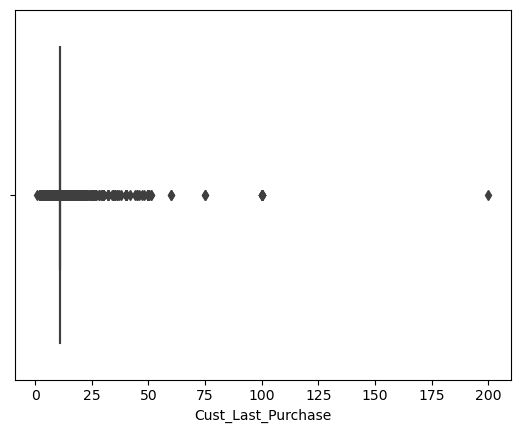

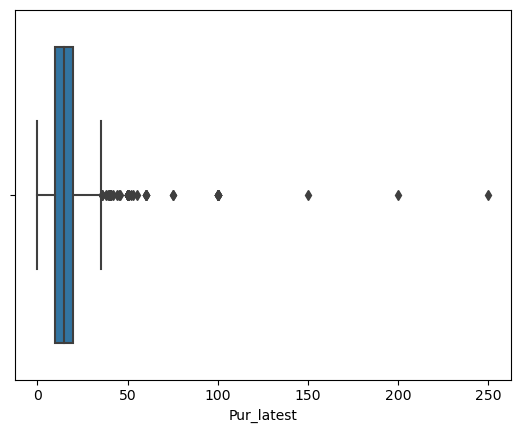

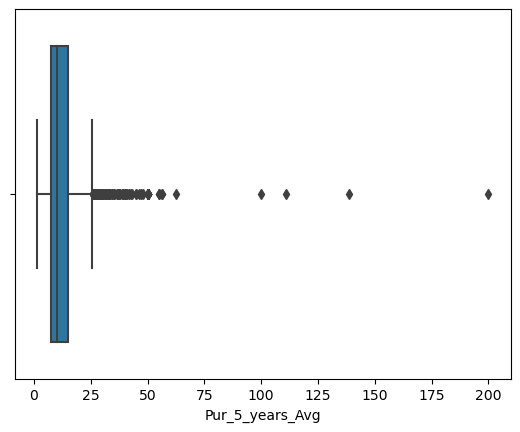

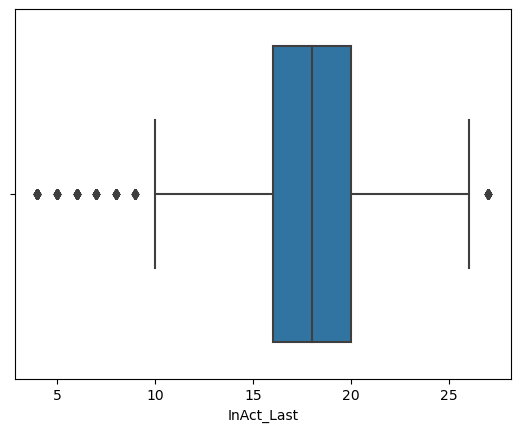

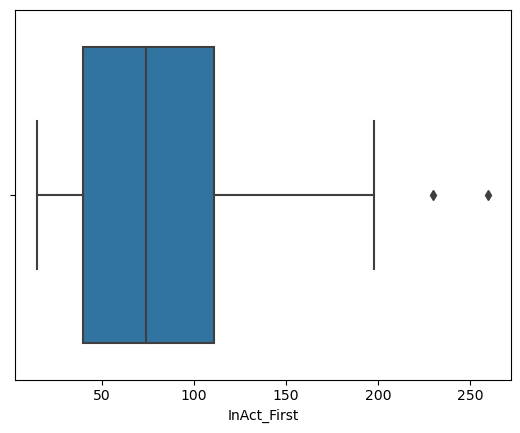

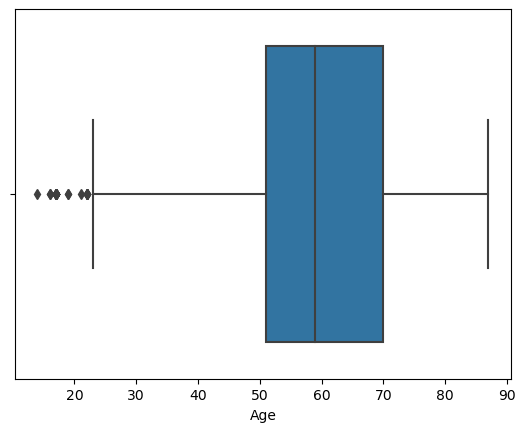

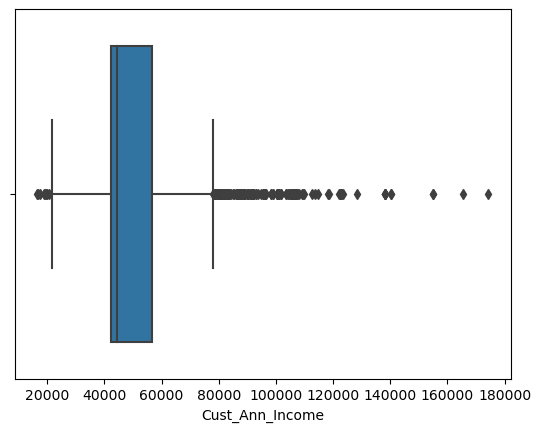

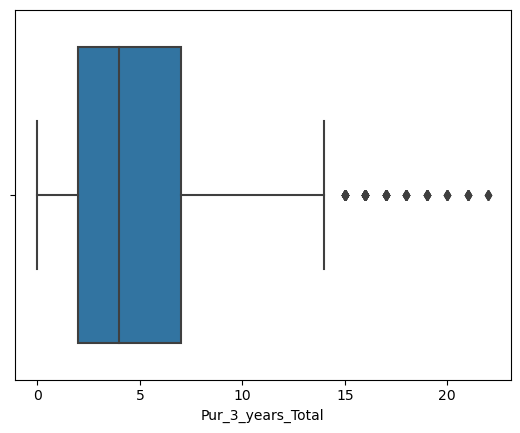

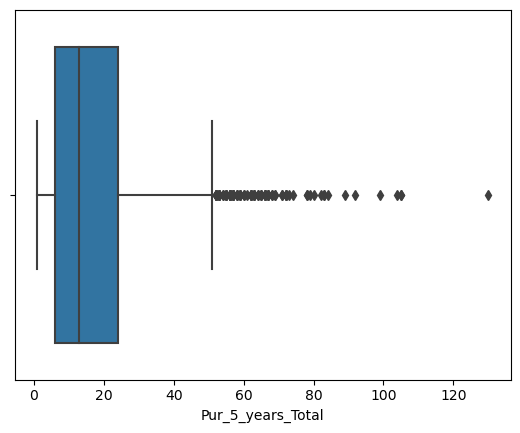

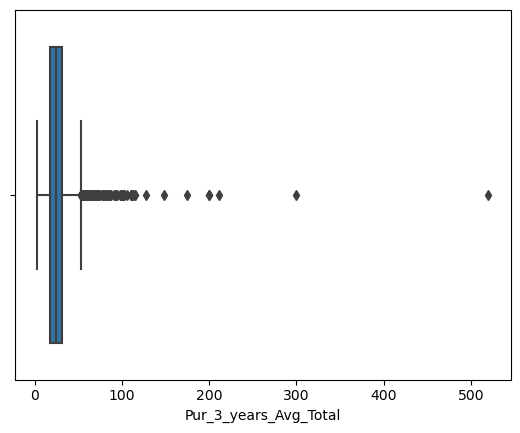

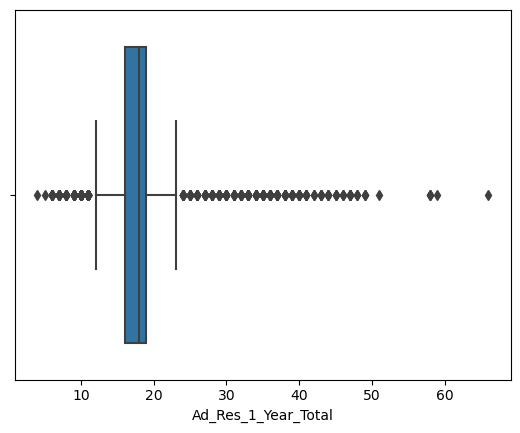

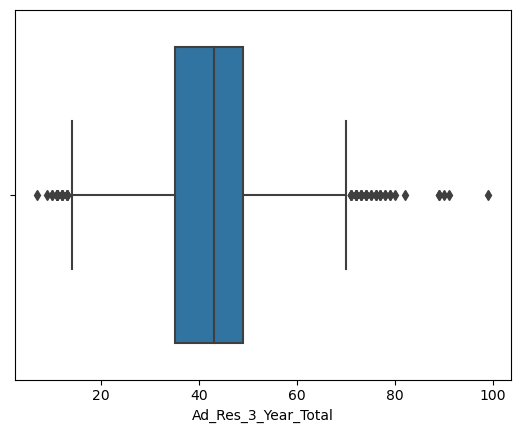

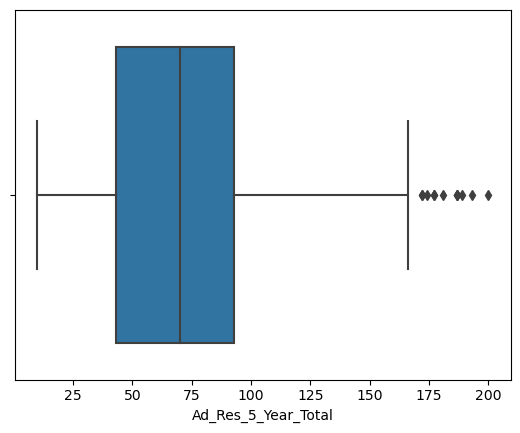

In [91]:
for i,x in enumerate(customers_new[new_numerical]):
    plt.figure(i)
    ax = sns.boxplot(data = customers_new, x = x)

### Insights

Almost all numerical variables has outliers. There must be action taken.

1. Consider whether the outlier values are valid and should be kept in the dataset. If they are valid, we may want to keep them  as they are.

2. If the outlier values are not valid or are the result of errors in data entry, we may want to consider dropping them from the dataset. This can be done using the pandas.DataFrame.drop method.

3. If the outlier values are valid but are significantly affecting the overall distribution of the data, we may want to transform the data to reduce the influence of the outliers. One way to do this is by using a mathematical function to squash the values closer to the center of the distribution. This is known as "data transformation" as we have done in previous code.

4. We could also consider using a different plot type, such as a scatterplot or a violin plot, to better visualize the data and identify patterns or trends.

5. Ultimately, the best course of action will depend on the specific context and goals of our analysis. It is always a good idea to carefully consider the implications of any changes you make to the dataset.
